## Background:
Surprise Housing a US based Housing company has decided to enter Australian Market.The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia


## Business Goal:
You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.


## Analytical goal:
- Which variables are significant in predicting the price of a house, and
- How well those variables describe the price of a house.
- Regularization using Ridge and Lasso


In [1]:
#important librarires
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn import metrics
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures,MinMaxScaler
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV, train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_rows', None) # to Display all the rows in the data
pd.set_option('display.max_columns', None) # to Display all the columns in the data

# 1.  Reading and Understanding the Data¶

In [4]:
data = pd.read_csv(r'C:\Users\pc\OneDrive\Desktop\Advance Regression assignment\train.csv')

In [5]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
data.shape

(1460, 81)

In [7]:
data.info() #check if there is any missing values and data type of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
data.describe() #check the details of numeriacl data


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [9]:
# checking the columns
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [11]:
# Checking % of Missing values
print(round(100*(data.isnull().sum()/len(data.index)),2))

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
Alley            93.77
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
BsmtCond          2.53
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtFinSF1        0.00
BsmtFinType2      2.60
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
1stFlrSF   

# Data Cleaning

In [12]:
# Removing identifier field as it has no impact on model building.
data.drop(['Id'], axis=1, inplace=True)

In [13]:
# Dropping duplicate values in dataset, if exists any
data = data.drop_duplicates()
print(data.shape)


(1460, 80)


In [14]:
# Dropping Columns with missing values greater than 15 %.
data.drop(['LotFrontage', 'Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], axis=1, inplace=True)

In [15]:
#Checking the missing % after ddropping the columns 
print(((data.isnull().sum()/data.shape[0])*100).round(2))

MSSubClass       0.00
MSZoning         0.00
LotArea          0.00
Street           0.00
LotShape         0.00
LandContour      0.00
Utilities        0.00
LotConfig        0.00
LandSlope        0.00
Neighborhood     0.00
Condition1       0.00
Condition2       0.00
BldgType         0.00
HouseStyle       0.00
OverallQual      0.00
OverallCond      0.00
YearBuilt        0.00
YearRemodAdd     0.00
RoofStyle        0.00
RoofMatl         0.00
Exterior1st      0.00
Exterior2nd      0.00
MasVnrType       0.55
MasVnrArea       0.55
ExterQual        0.00
ExterCond        0.00
Foundation       0.00
BsmtQual         2.53
BsmtCond         2.53
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtFinSF1       0.00
BsmtFinType2     2.60
BsmtFinSF2       0.00
BsmtUnfSF        0.00
TotalBsmtSF      0.00
Heating          0.00
HeatingQC        0.00
CentralAir       0.00
Electrical       0.07
1stFlrSF         0.00
2ndFlrSF         0.00
LowQualFinSF     0.00
GrLivArea        0.00
BsmtFullBath     0.00
BsmtHalfBa

In [16]:
# Analysing columns which still have NaN values in them.
print(data['MasVnrType'].describe(), end='\n\n')      # 0.55% NaN
print(data['MasVnrArea'].describe(), end='\n\n')      # 0.55% NaN
print(data['BsmtQual'].describe(), end='\n\n')        # 2.53% NaN
print(data['BsmtCond'].describe(), end='\n\n')        # 2.53% NaN
print(data['BsmtExposure'].describe(), end='\n\n')    # 2.60% NaN
print(data['BsmtFinType1'].describe(), end='\n\n')    # 2.53% NaN
print(data['BsmtFinType2'].describe(), end='\n\n')    # 2.60% NaN
print(data['Electrical'].describe(), end='\n\n')      # 0.07% NaN
print(data['GarageType'].describe(), end='\n\n')      # 5.55% NaN
print(data['GarageYrBlt'].describe(), end='\n\n')     # 5.55% NaN
print(data['GarageFinish'].describe(), end='\n\n')    # 5.55% NaN
print(data['GarageQual'].describe(), end='\n\n')      # 5.55% NaN
print(data['GarageCond'].describe(), end='\n\n')      # 5.55% NaN


count     1452
unique       4
top       None
freq       864
Name: MasVnrType, dtype: object

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

count     1423
unique       4
top         TA
freq       649
Name: BsmtQual, dtype: object

count     1423
unique       4
top         TA
freq      1311
Name: BsmtCond, dtype: object

count     1422
unique       4
top         No
freq       953
Name: BsmtExposure, dtype: object

count     1423
unique       6
top        Unf
freq       430
Name: BsmtFinType1, dtype: object

count     1422
unique       6
top        Unf
freq      1256
Name: BsmtFinType2, dtype: object

count      1459
unique        5
top       SBrkr
freq       1334
Name: Electrical, dtype: object

count       1379
unique         6
top       Attchd
freq         870
Name: GarageType, dtype: object

count    1379.000000
mean     1978.50616

### Missing Value imputation

In [17]:
# Missing Value imputation.
data.MasVnrArea = data.MasVnrArea.fillna(data.MasVnrArea.median()) 
data.MasVnrType = data.MasVnrType.fillna('None')#replace Nan values of MasVnrArea with None i.e. No Masonary type
data.BsmtQual = data.BsmtQual.fillna('NA')#replace Nan values of BsmtQual with NA i.e. No Basement
data.BsmtCond = data.BsmtCond.fillna('NA')#replace Nan values of BsmtCond with NA i.e. No Basement
data.BsmtExposure = data.BsmtExposure.fillna('No')#replace Nan values of BsmtExposure with No i.e. No Exposure
data.BsmtFinType1 = data.BsmtFinType1.fillna('NA')#replace Nan values of BsmtFinType1 with NA i.e. No Basement
data.BsmtFinType2 = data.BsmtFinType2.fillna('NA')#replace Nan values of BsmtFinType2 with NA i.e. No Basement
data.Electrical = data.Electrical.fillna(data.Electrical.mode()[0])#impute missing values of Electrical with mode due to categorical column
data.GarageType = data.GarageType.fillna('NA')#replace Nan values of GarageType with NA i.e. No Garage
data.GarageYrBlt = data.GarageYrBlt.fillna(0)#replace Nan values of GarageYrBlt with 0 i.e. No Garage
data.GarageFinish = data.GarageFinish.fillna('NA')#replace Nan values of GarageFinish with NA i.e. No Garage
data.GarageQual = data.GarageQual.fillna('NA')#replace Nan values of GarageQual with NA i.e. No Garage
data.GarageCond = data.GarageCond.fillna('NA')#replace Nan values of GarageCond with NA i.e. No Garage

In [18]:
# Checking missing Value % again
print(((data.isnull().sum()/data.shape[0])*100).round(2))

MSSubClass       0.0
MSZoning         0.0
LotArea          0.0
Street           0.0
LotShape         0.0
LandContour      0.0
Utilities        0.0
LotConfig        0.0
LandSlope        0.0
Neighborhood     0.0
Condition1       0.0
Condition2       0.0
BldgType         0.0
HouseStyle       0.0
OverallQual      0.0
OverallCond      0.0
YearBuilt        0.0
YearRemodAdd     0.0
RoofStyle        0.0
RoofMatl         0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
MasVnrArea       0.0
ExterQual        0.0
ExterCond        0.0
Foundation       0.0
BsmtQual         0.0
BsmtCond         0.0
BsmtExposure     0.0
BsmtFinType1     0.0
BsmtFinSF1       0.0
BsmtFinType2     0.0
BsmtFinSF2       0.0
BsmtUnfSF        0.0
TotalBsmtSF      0.0
Heating          0.0
HeatingQC        0.0
CentralAir       0.0
Electrical       0.0
1stFlrSF         0.0
2ndFlrSF         0.0
LowQualFinSF     0.0
GrLivArea        0.0
BsmtFullBath     0.0
BsmtHalfBath     0.0
FullBath         0.0
HalfBath     

In [19]:
# Derieved a new metrics age of house i.e. HouseAge from YrSold - YearBuilt 
data['HouseAge'] = data.YrSold - data.YearBuilt
#Drop YrSold, YearBuilt after HouseAge as they are not required any more.
data=data.drop(columns=['YrSold', 'YearBuilt'])

In [20]:
#convert MSSubClass into object type 
convert_dict = {'MSSubClass':object}
data = data.astype(convert_dict)

In [21]:
# Query to check Bias Data %
for c in data.columns:
    if data[c].dtype == np.object :
        print(c)
        print(data[c].value_counts(normalize=True))

MSSubClass
20     0.367123
60     0.204795
50     0.098630
120    0.059589
30     0.047260
160    0.043151
70     0.041096
80     0.039726
90     0.035616
190    0.020548
85     0.013699
75     0.010959
45     0.008219
180    0.006849
40     0.002740
Name: MSSubClass, dtype: float64
MSZoning
RL         0.788356
RM         0.149315
FV         0.044521
RH         0.010959
C (all)    0.006849
Name: MSZoning, dtype: float64
Street
Pave    0.99589
Grvl    0.00411
Name: Street, dtype: float64
LotShape
Reg    0.633562
IR1    0.331507
IR2    0.028082
IR3    0.006849
Name: LotShape, dtype: float64
LandContour
Lvl    0.897945
Bnk    0.043151
HLS    0.034247
Low    0.024658
Name: LandContour, dtype: float64
Utilities
AllPub    0.999315
NoSeWa    0.000685
Name: Utilities, dtype: float64
LotConfig
Inside     0.720548
Corner     0.180137
CulDSac    0.064384
FR2        0.032192
FR3        0.002740
Name: LotConfig, dtype: float64
LandSlope
Gtl    0.946575
Mod    0.044521
Sev    0.008904
Name: LandSlop

In [22]:
#Dropped columns with more than 80% bias data
data=data.drop(columns=['Street', 'LandContour', 'Utilities', 'LandSlope', 'Condition2', 'RoofMatl', 'BsmtCond'
                                    ,'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageQual', 'GarageCond'
                                    , 'PavedDrive', 'Condition1', 'BldgType', 'ExterCond', 'BsmtFinType2', 'SaleType'
                                    , 'SaleCondition'])

In [23]:
# Mapping data on the basis of the data dictionary:
data = data.replace({'ExterQual':{'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})#Replace ExterQual 1,2,3,4,5 -> Po, Fa, TA, Gd, Ex
data = data.replace({'BsmtQual':{'NA':0,'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})#Replace BsmtQual 0,1,2,3,4,5 -> NA, Po, Fa, TA, Gd, Ex
data = data.replace({'BsmtExposure':{'NA':0, 'No':1,'Mn':2, 'Av':3, 'Gd':4}})#Replace BsmtExposure 0,1,2,3,4 -> NA, No, Mn, Av, gd  
data = data.replace({'BsmtFinType1':{'NA':0,'Unf':1,'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6}})#replace BsmtFinType1 0,1,2,3,4,5,6 -> NA, Unf, LwQ, Rec, BLQ, ALQ, GLQ
data = data.replace({'HeatingQC':{'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})#replace HeatingQC 1,2,3,4,5 -> Po, Fa, TA, Gd, Ex
data = data.replace({'KitchenQual':{'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})#replace KitchenQual 1,2,3,4,5 -> Po, Fa, TA, Gd, Ex



In [24]:
# Defining method for plotting graphs based on numerical/continuous variables
def numericColAnalysis(data_frame, index,independent_variable ,target_variable):
    plt.figure(figsize = (20, 26))
    plt.figure(index)
    sns.jointplot(x = independent_variable, y = target_variable, data = data_frame[[independent_variable,target_variable]])

In [25]:
#Get all numerical Columns
numerical_columns = data.select_dtypes(include = np.number).columns.tolist()
numerical_columns.remove('SalePrice')

In [26]:
numerical_columns

['LotArea',
 'OverallQual',
 'OverallCond',
 'YearRemodAdd',
 'MasVnrArea',
 'ExterQual',
 'BsmtQual',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'HeatingQC',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'HouseAge']

<Figure size 432x288 with 0 Axes>

<Figure size 1440x1872 with 0 Axes>

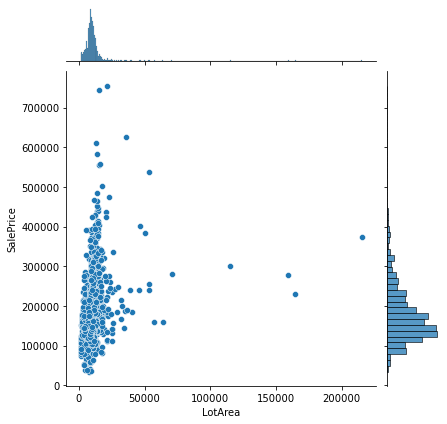

<Figure size 1440x1872 with 0 Axes>

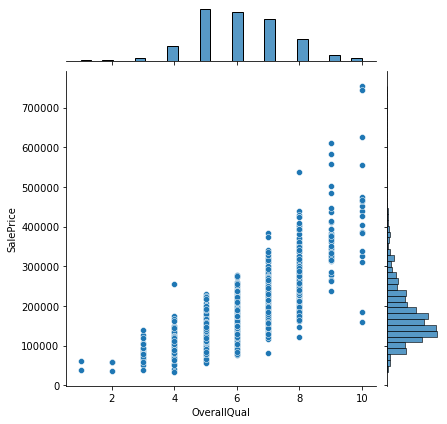

<Figure size 1440x1872 with 0 Axes>

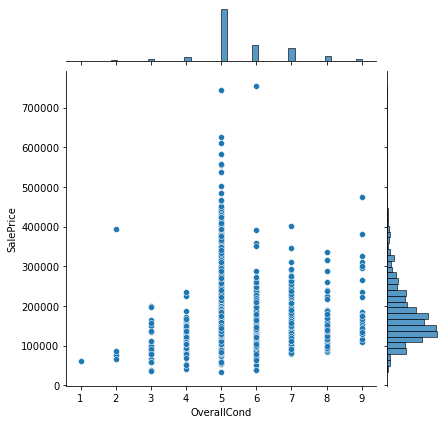

<Figure size 1440x1872 with 0 Axes>

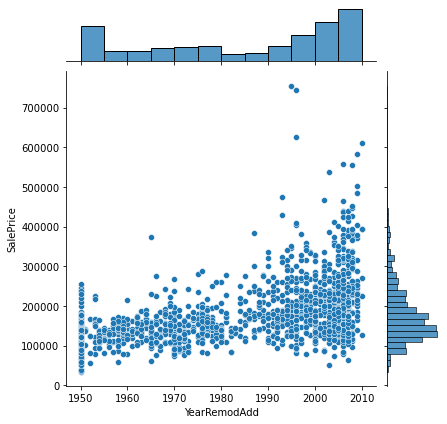

<Figure size 1440x1872 with 0 Axes>

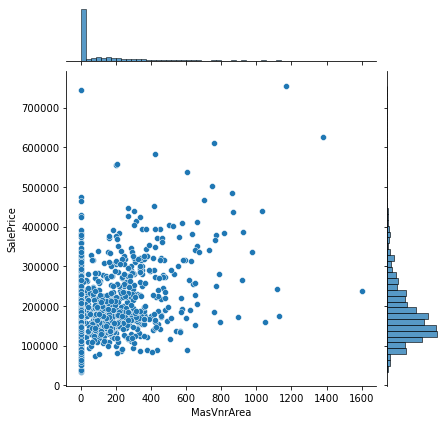

<Figure size 1440x1872 with 0 Axes>

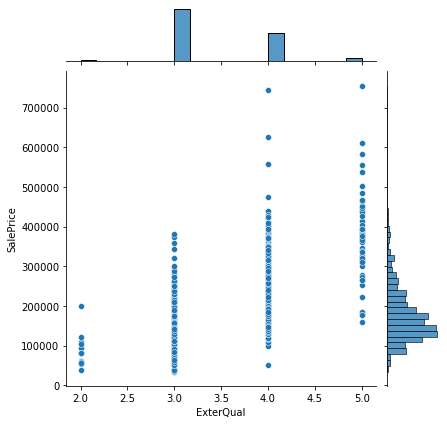

<Figure size 1440x1872 with 0 Axes>

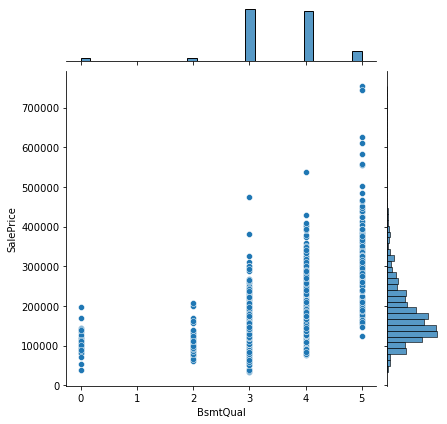

<Figure size 1440x1872 with 0 Axes>

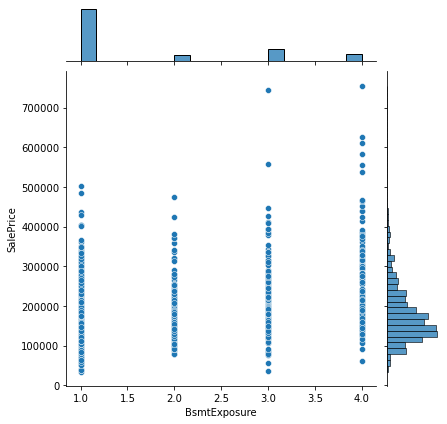

<Figure size 1440x1872 with 0 Axes>

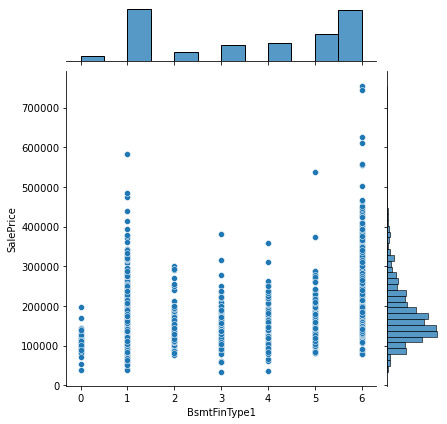

<Figure size 1440x1872 with 0 Axes>

<Figure size 1440x1872 with 0 Axes>

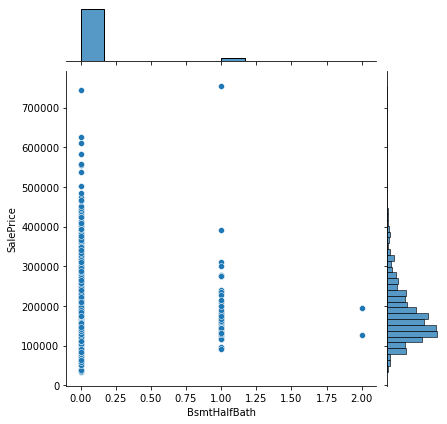

<Figure size 1440x1872 with 0 Axes>

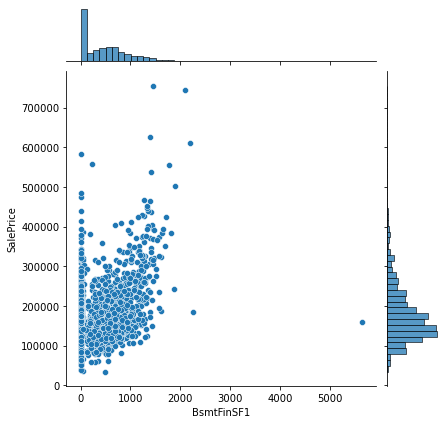

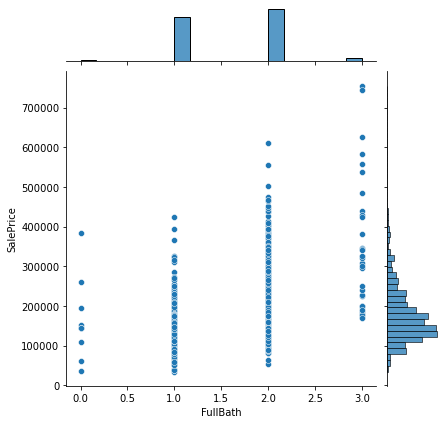

<Figure size 1440x1872 with 0 Axes>

<Figure size 1440x1872 with 0 Axes>

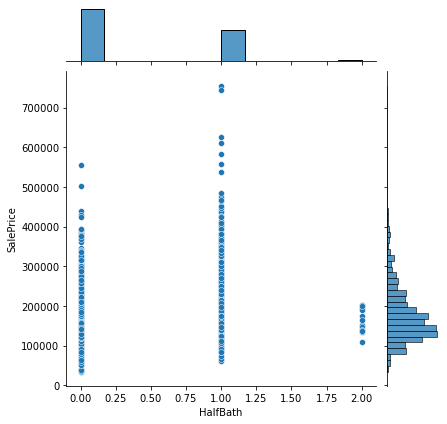

<Figure size 1440x1872 with 0 Axes>

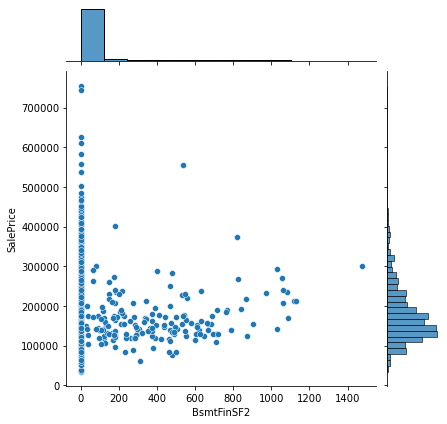

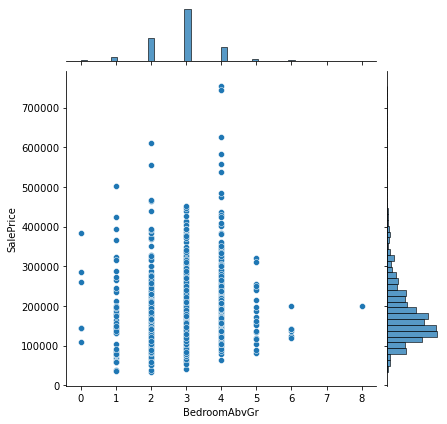

<Figure size 1440x1872 with 0 Axes>

<Figure size 1440x1872 with 0 Axes>

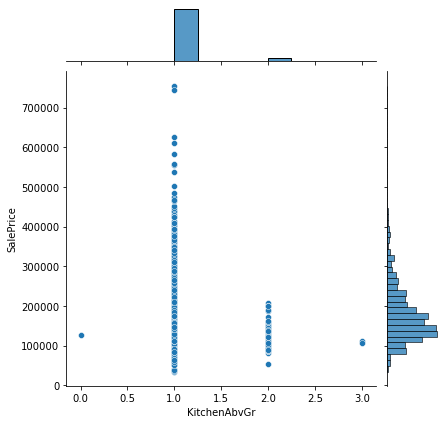

<Figure size 1440x1872 with 0 Axes>

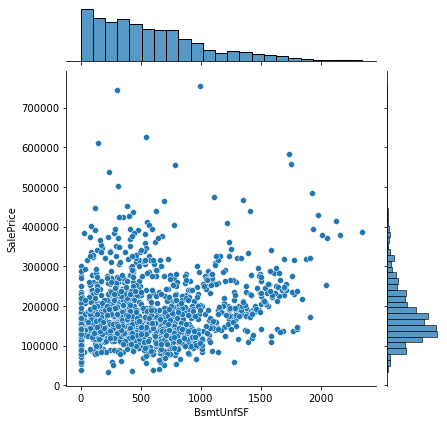

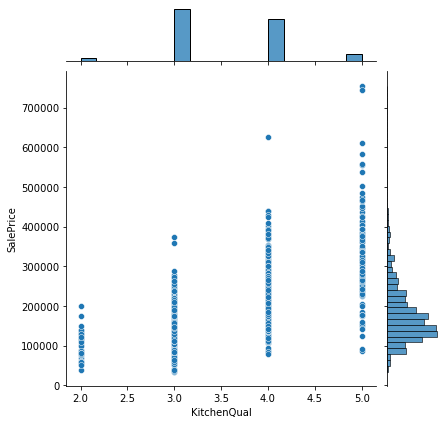

<Figure size 1440x1872 with 0 Axes>

<Figure size 1440x1872 with 0 Axes>

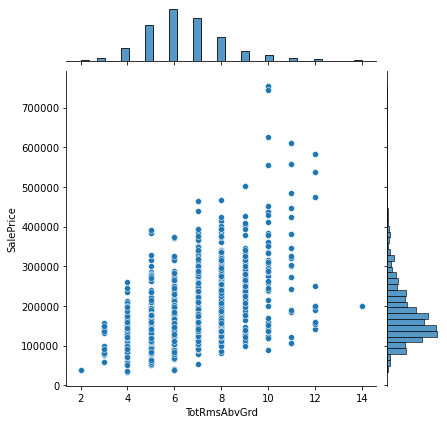

<Figure size 1440x1872 with 0 Axes>

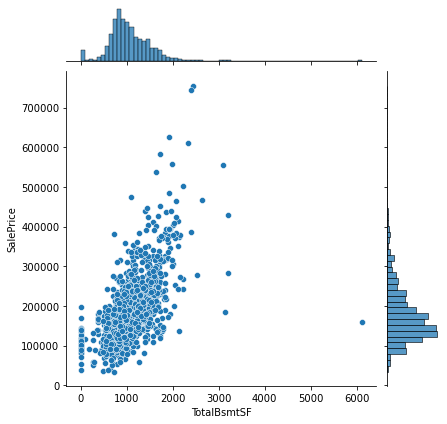

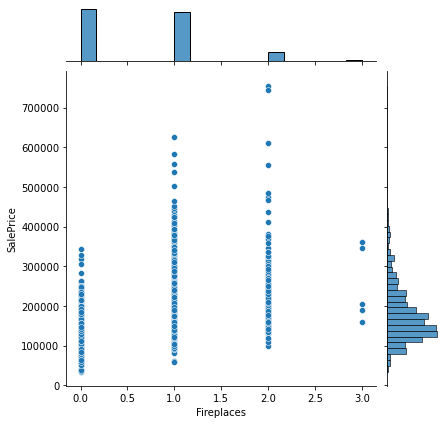

<Figure size 1440x1872 with 0 Axes>

<Figure size 1440x1872 with 0 Axes>

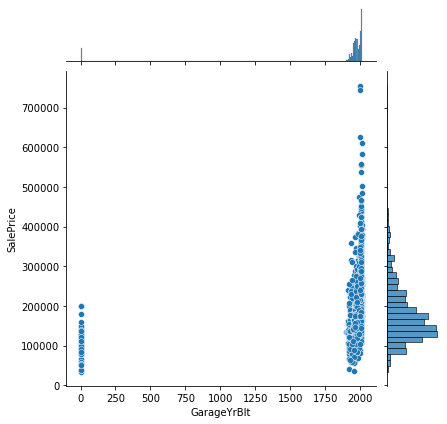

<Figure size 1440x1872 with 0 Axes>

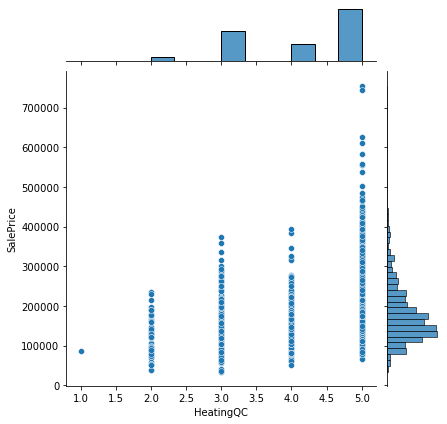

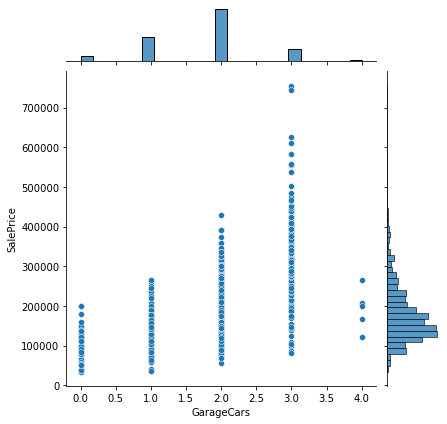

<Figure size 1440x1872 with 0 Axes>

<Figure size 1440x1872 with 0 Axes>

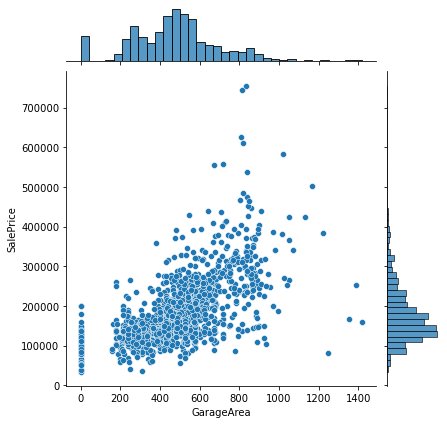

<Figure size 1440x1872 with 0 Axes>

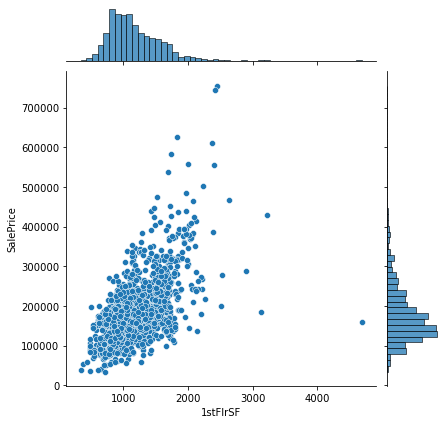

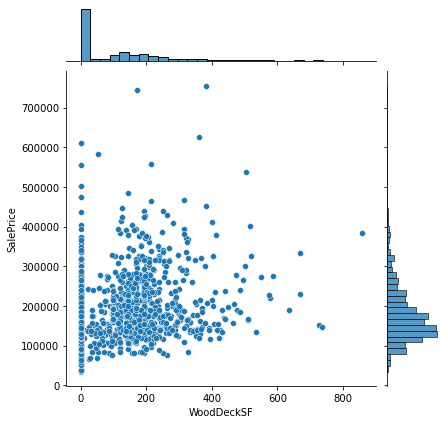

<Figure size 1440x1872 with 0 Axes>

<Figure size 1440x1872 with 0 Axes>

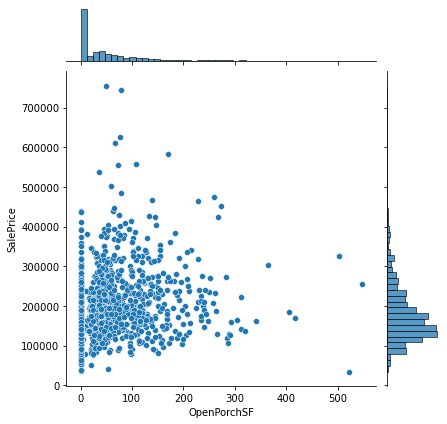

<Figure size 1440x1872 with 0 Axes>

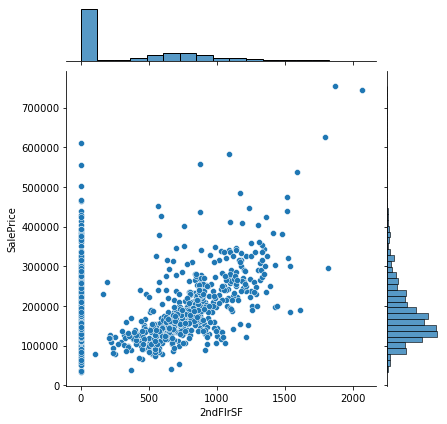

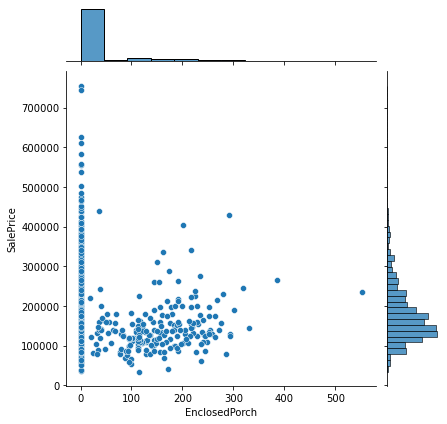

<Figure size 1440x1872 with 0 Axes>

<Figure size 1440x1872 with 0 Axes>

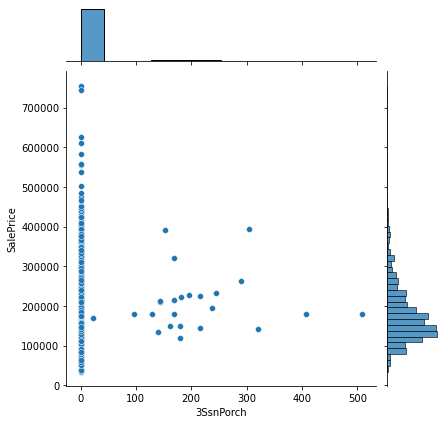

<Figure size 1440x1872 with 0 Axes>

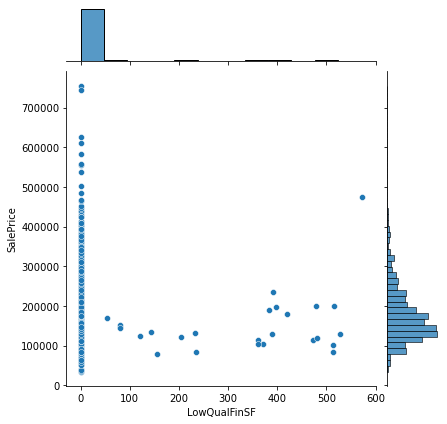

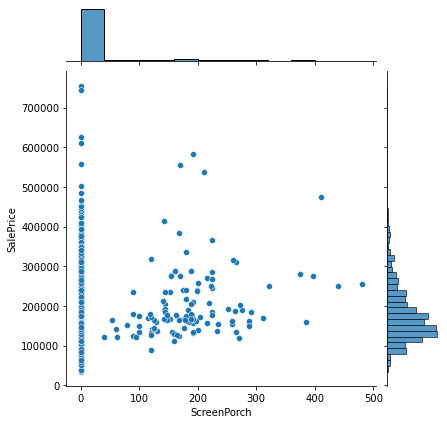

<Figure size 1440x1872 with 0 Axes>

<Figure size 1440x1872 with 0 Axes>

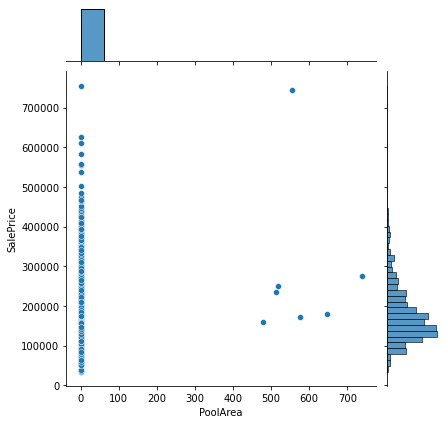

<Figure size 1440x1872 with 0 Axes>

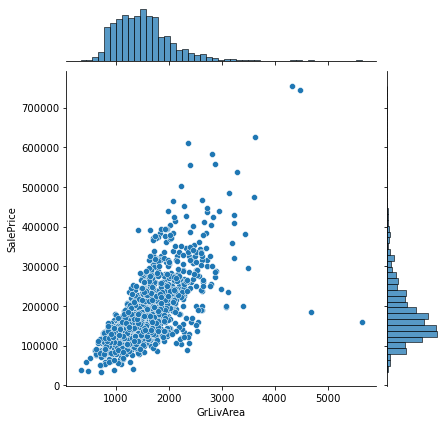

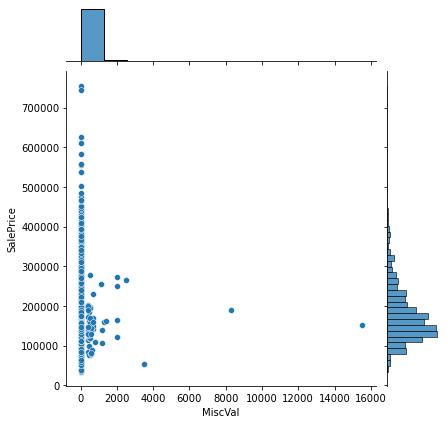

<Figure size 1440x1872 with 0 Axes>

<Figure size 1440x1872 with 0 Axes>

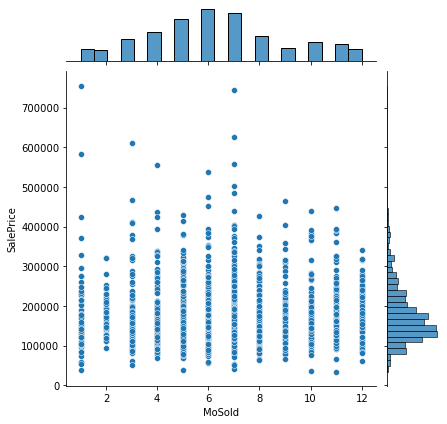

<Figure size 1440x1872 with 0 Axes>

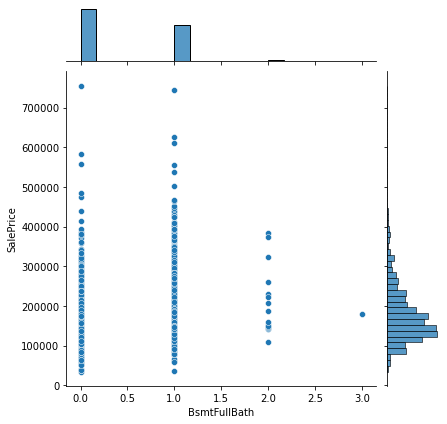

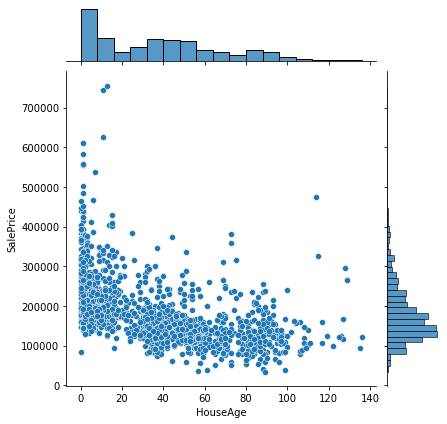

In [28]:
#Ploting the graph for all numerical variables
for index, col in enumerate(numerical_columns):
    numericColAnalysis(data, index, col, 'SalePrice')
    
plt.show()

In [29]:
# Defining method for plotting graphs based on categorical variables
def categoricalColAnalysis(data_frame, index,independent_variable ,target_variable):
    plt.figure(index)
    variables = data_frame[[independent_variable]].nunique()
    plt.figure(figsize = (variables,variables/1.77))
    my_order = data_frame[[independent_variable,target_variable]].groupby(by = [independent_variable])[target_variable].median().sort_values(ascending=True)
    sns.boxplot(x = independent_variable, y = target_variable, data= data_frame[[independent_variable,target_variable]], order = my_order.index)

In [30]:
#Get all categorical Columns
categorical_columns = data.select_dtypes(include = np.object).columns.tolist()
for col in categorical_columns:
    print(col,' : ',data[col].head().unique())

MSSubClass  :  [60 20 70]
MSZoning  :  ['RL']
LotShape  :  ['Reg' 'IR1']
LotConfig  :  ['Inside' 'FR2' 'Corner']
Neighborhood  :  ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge']
HouseStyle  :  ['2Story' '1Story']
RoofStyle  :  ['Gable']
Exterior1st  :  ['VinylSd' 'MetalSd' 'Wd Sdng']
Exterior2nd  :  ['VinylSd' 'MetalSd' 'Wd Shng']
MasVnrType  :  ['BrkFace' 'None']
Foundation  :  ['PConc' 'CBlock' 'BrkTil']
GarageType  :  ['Attchd' 'Detchd']
GarageFinish  :  ['RFn' 'Unf']


<Figure size 432x288 with 0 Axes>

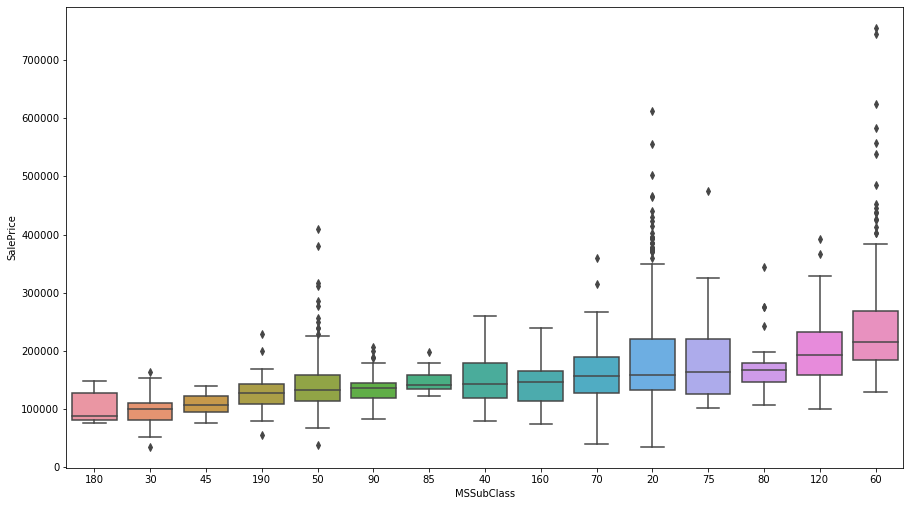

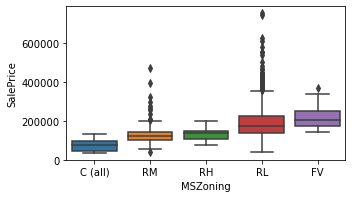

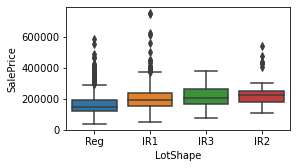

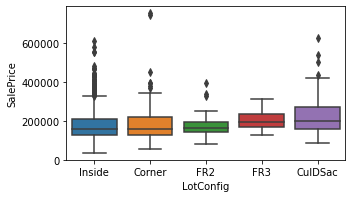

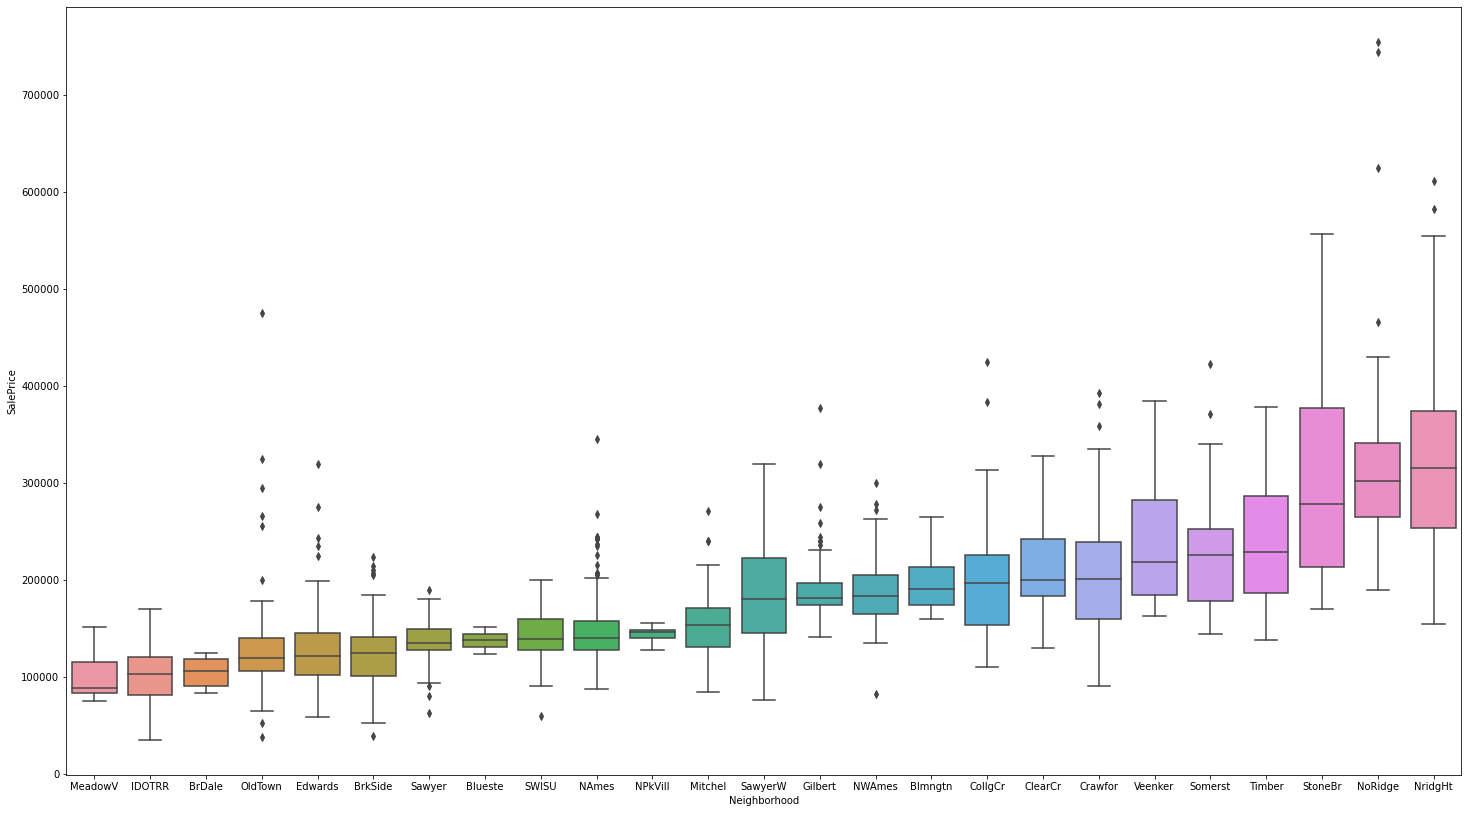

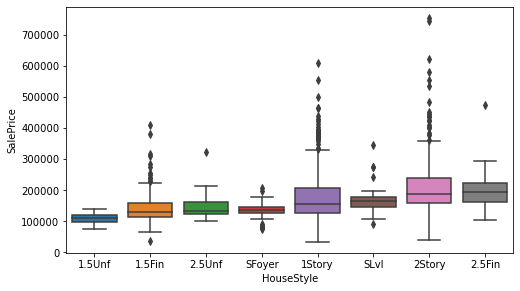

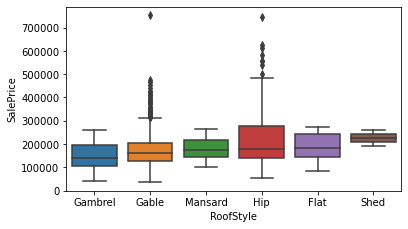

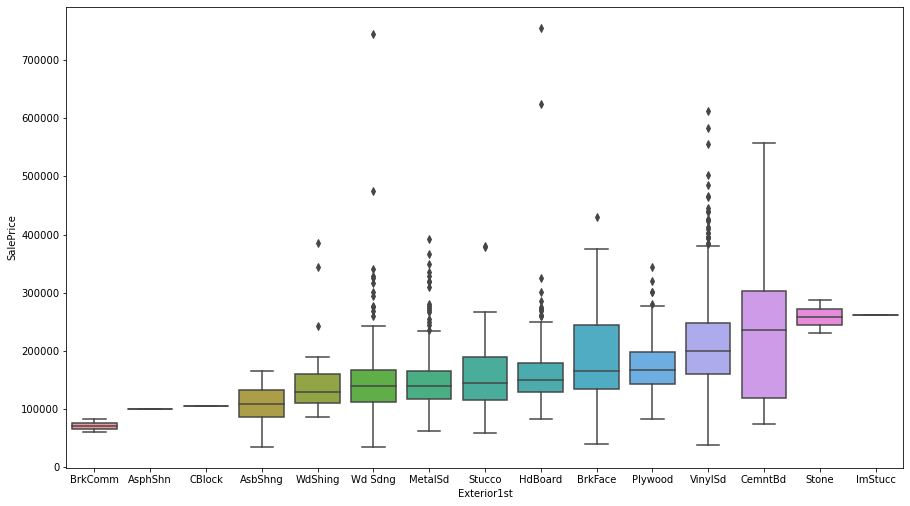

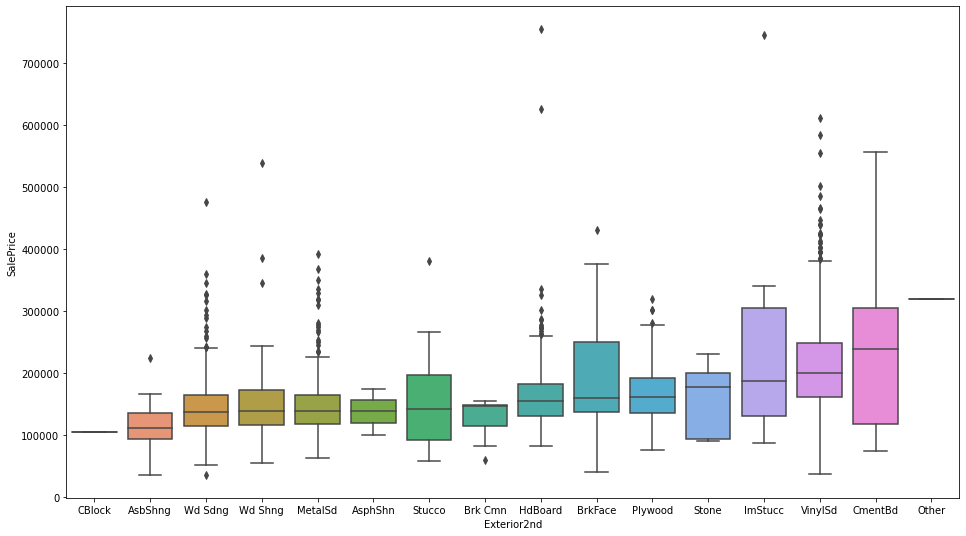

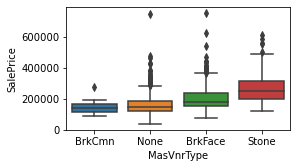

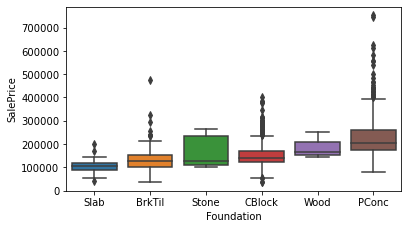

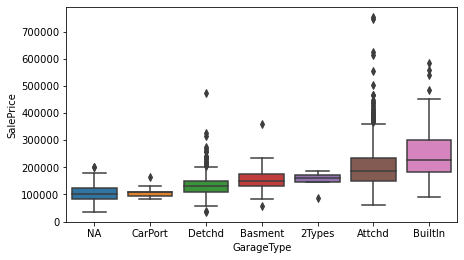

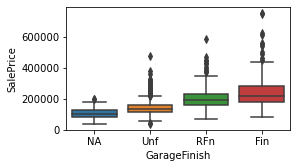

In [31]:
#Ploting the graph for all categorical variables
for index, col in enumerate(categorical_columns):
    categoricalColAnalysis(data, index, col, 'SalePrice')


In [32]:
#Check data again
data.head()

,MSSubClass,MSZoning,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge
0,60,RL,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5
1,20,RL,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31
2,60,RL,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7
3,70,RL,9550,IR1,Corner,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,140000,91
4,60,RL,14260,IR1,FR2,NoRidge,2Story,8,5,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,4,PConc,4,3,6,655,0,490,1145,5,1145,1053,0,2198,1,0,2,1,4,1,4,9,1,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,0,12,250000,8


In [33]:
# Checkin data info again
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 53 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   MSZoning       1460 non-null   object 
 2   LotArea        1460 non-null   int64  
 3   LotShape       1460 non-null   object 
 4   LotConfig      1460 non-null   object 
 5   Neighborhood   1460 non-null   object 
 6   HouseStyle     1460 non-null   object 
 7   OverallQual    1460 non-null   int64  
 8   OverallCond    1460 non-null   int64  
 9   YearRemodAdd   1460 non-null   int64  
 10  RoofStyle      1460 non-null   object 
 11  Exterior1st    1460 non-null   object 
 12  Exterior2nd    1460 non-null   object 
 13  MasVnrType     1460 non-null   object 
 14  MasVnrArea     1460 non-null   float64
 15  ExterQual      1460 non-null   int64  
 16  Foundation     1460 non-null   object 
 17  BsmtQual       1460 non-null   int64  
 18  BsmtExpo

In [34]:
#Checking shape of data again
data.shape

(1460, 53)

In [35]:
#Fetching all object type columns from data.

object_columns = []
for c in data.columns:
    if data[c].dtype == np.object:
        object_columns.append(c)
print(object_columns)

['MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'GarageType', 'GarageFinish']


# Creating Dummy Varibales

In [36]:
# Create dummy variable for MSSubClass
MSSubClass_d = pd.get_dummies(data['MSSubClass'],drop_first=True, prefix='MSSubClass')

In [37]:
#concat MSSubClass_d with data
data = pd.concat([data,MSSubClass_d],axis=1)
data.head()

,MSSubClass,MSZoning,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190
0,60,RL,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,20,RL,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,60,RL,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,70,RL,9550,IR1,Corner,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,140000,91,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,60,RL,14260,IR1,FR2,NoRidge,2Story,8,5,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,4,PConc,4,3,6,655,0,490,1145,5,1145,1053,0,2198,1,0,2,1,4,1,4,9,1,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,0,12,250000,8,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [38]:
#create dummy variable for 'MSZoning'
MSZoning_d = pd.get_dummies(data['MSZoning'],drop_first=True, prefix='MSZoning')

In [39]:
#concat MSZoning_d with main data 
data = pd.concat([data,MSZoning_d],axis=1)
data.head()

,MSSubClass,MSZoning,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM
0,60,RL,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,20,RL,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,60,RL,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
3,70,RL,9550,IR1,Corner,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,140000,91,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
4,60,RL,14260,IR1,FR2,NoRidge,2Story,8,5,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,4,PConc,4,3,6,655,0,490,1145,5,1145,1053,0,2198,1,0,2,1,4,1,4,9,1,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,0,12,250000,8,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0


In [40]:
#create dummy variable for LotShape
LotShape_d = pd.get_dummies(data['LotShape'],drop_first=True, prefix='LotShape')
#concat LotShape_d with data 
data = pd.concat([data,LotShape_d],axis=1)
data.head()

,MSSubClass,MSZoning,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg
0,60,RL,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,20,RL,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
2,60,RL,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,70,RL,9550,IR1,Corner,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,140000,91,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,60,RL,14260,IR1,FR2,NoRidge,2Story,8,5,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,4,PConc,4,3,6,655,0,490,1145,5,1145,1053,0,2198,1,0,2,1,4,1,4,9,1,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,0,12,250000,8,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [41]:
#create dummy variable for LotConfig
LotConfig_d = pd.get_dummies(data['LotConfig'],drop_first=True, prefix='LotConfig')
#concat LotConfig_d with data
data = pd.concat([data,LotConfig_d],axis=1)
data.head()

,MSSubClass,MSZoning,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside
0,60,RL,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1
1,20,RL,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0
2,60,RL,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
3,70,RL,9550,IR1,Corner,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,140000,91,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,60,RL,14260,IR1,FR2,NoRidge,2Story,8,5,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,4,PConc,4,3,6,655,0,490,1145,5,1145,1053,0,2198,1,0,2,1,4,1,4,9,1,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,0,12,250000,8,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0


In [42]:
#create dummy variable for Neighborhood
Neighborhood_d = pd.get_dummies(data['Neighborhood'],drop_first=True, prefix='Neighborhood')
#concat Neighborhood_d with data
data = pd.concat([data,Neighborhood_d],axis=1)
data.head()

,MSSubClass,MSZoning,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
0,60,RL,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,20,RL,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,60,RL,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,70,RL,9550,IR1,Corner,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,140000,91,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,60,RL,14260,IR1,FR2,NoRidge,2Story,8,5,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,4,PConc,4,3,6,655,0,490,1145,5,1145,1053,0,2198,1,0,2,1,4,1,4,9,1,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,0,12,250000,8,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [43]:
#create dummy variable for HouseStyle
HouseStyle_d = pd.get_dummies(data['HouseStyle'],drop_first=True, prefix='HouseStyle')
#concat HouseStyle_d with data
data = pd.concat([data,HouseStyle_d],axis=1)
data.head()

,MSSubClass,MSZoning,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl
0,60,RL,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,20,RL,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
2,60,RL,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,70,RL,9550,IR1,Corner,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,140000,91,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,60,RL,14260,IR1,FR2,NoRidge,2Story,8,5,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,4,PConc,4,3,6,655,0,490,1145,5,1145,1053,0,2198,1,0,2,1,4,1,4,9,1,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,0,12,250000,8,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [44]:
#create dummy variable for RoofStyle
RoofStyle_d = pd.get_dummies(data['RoofStyle'],drop_first=True, prefix='RoofStyle')
#concat RoofStyle_d with data
data = pd.concat([data,RoofStyle_d],axis=1)
data.head()

,MSSubClass,MSZoning,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed
0,60,RL,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,20,RL,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0
2,60,RL,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,70,RL,9550,IR1,Corner,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,140000,91,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
4,60,RL,14260,IR1,FR2,NoRidge,2Story,8,5,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,4,PConc,4,3,6,655,0,490,1145,5,1145,1053,0,2198,1,0,2,1,4,1,4,9,1,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,0,12,250000,8,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0


In [45]:
#create dummy variable for Exterior1st
Exterior1st_d = pd.get_dummies(data['Exterior1st'],drop_first=True, prefix='Exterior1st')
#concat Exterior1st_d with data
data = pd.concat([data,Exterior1st_d],axis=1)
data.head()

,MSSubClass,MSZoning,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing
0,60,RL,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,20,RL,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,60,RL,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,70,RL,9550,IR1,Corner,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,140000,91,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,60,RL,14260,IR1,FR2,NoRidge,2Story,8,5,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,4,PConc,4,3,6,655,0,490,1145,5,1145,1053,0,2198,1,0,2,1,4,1,4,9,1,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,0,12,250000,8,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [46]:
#create dummy variable for Exterior2nd
Exterior2nd_d = pd.get_dummies(data['Exterior2nd'],drop_first=True, prefix='Exterior2nd')
#concat Exterior2nd_d with data
data = pd.concat([data,Exterior2nd_d],axis=1)
data.head()

,MSSubClass,MSZoning,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng
0,60,RL,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,20,RL,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,60,RL,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,70,RL,9550,IR1,Corner,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,140000,91,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,60,RL,14260,IR1,FR2,NoRidge,2Story,8,5,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,4,PConc,4,3,6,655,0,490,1145,5,1145,1053,0,2198,1,0,2,1,4,1,4,9,1,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,0,12,250000,8,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,

In [47]:
#create dummy variable for MasVnrType
MasVnrType_d = pd.get_dummies(data['MasVnrType'],drop_first=True, prefix='MasVnrType')
#concat MasVnrType_d with data
data = pd.concat([data,MasVnrType_d],axis=1)
data.head()

,MSSubClass,MSZoning,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone
0,60,RL,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
1,20,RL,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
2,60,RL,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
3,70,RL,9550,IR1,Corner,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,140000,91,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
4,60,RL,14260,IR1,FR2,NoRidge,2Story,8,5,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,4,PConc,4,3,6,655,0,490,1145,5,1145,1053,0,2198,1,0,2,1,4,1,4,9,1,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,0,12,250000,8,0,0,0,0,1,0,0,0,0,

In [48]:
#create dummy variable for Foundation
Foundation_d = pd.get_dummies(data['Foundation'],drop_first=True, prefix='Foundation')
#concat Foundation_d with data
data = pd.concat([data,Foundation_d],axis=1)
data.head()

,MSSubClass,MSZoning,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood
0,60,RL,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0
1,20,RL,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
2,60,RL,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0
3,70,RL,9550,IR1,Corner,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,140000,91,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
4,60,RL,14260,IR1,FR2,NoRidge,2Story,8,5,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,4,PConc,4,3,6

In [49]:
#create dummy variable for GarageType
GarageType_d = pd.get_dummies(data['GarageType'],drop_first=True, prefix='GarageType')
#concat GarageType_d with data 
data = pd.concat([data,GarageType_d],axis=1)
data.head()

,MSSubClass,MSZoning,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA
0,60,RL,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0
1,20,RL,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0
2,60,RL,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0
3,70,RL,9550,IR1,Corner,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,140000,91,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,

In [50]:
#create dummy variable for GarageFinish
GarageFinish_d = pd.get_dummies(data['GarageFinish'],drop_first=True, prefix='GarageFinish')
#concat GarageFinish_d with data 
data = pd.concat([data,GarageFinish_d],axis=1)
data.head()

,MSSubClass,MSZoning,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf
0,60,RL,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
1,20,RL,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0
2,60,RL,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
3,70,RL,9550,IR1,Corner,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,140000,91,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,

In [51]:
#Dropping categorical variables after ceating dummy varaibles
data=data.drop(columns=['MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'HouseStyle'
                                    , 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation',
                                    'GarageType', 'GarageFinish'])

In [52]:
#checking data shape after dropping source variable for dummy variable.
data.shape

(1460, 147)

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

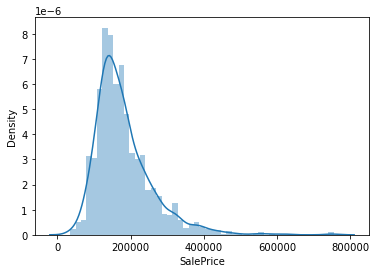

In [53]:
# Checking the distribution for target varibale SalePrice
sns.distplot(data['SalePrice'])

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

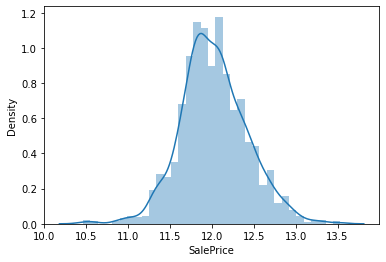

In [54]:
#Transforming SalePrice by using Log function
data['SalePrice']= np.log(data['SalePrice'])
# checking distribution of SalePrice again
sns.distplot(data['SalePrice'])

In [55]:
data.head() # checking top 5 rows of data again.

,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf
0,8450,7,5,2003,196.0,4,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,12.247694,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
1,9600,6,8,1976,0.0,3,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,12.109011,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0
2,11250,7,5,2002,162.0,4,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,12.317167,7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
3,9550,7,5,1970,0.0,3,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,11.849398,91,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
4,14260,8,5,2000,350.0,4,4,3,6,655,0,490,1145,5,1145,1053,0,2198,1,0,2,1,4,1,4,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,12.429216,8,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,

In [56]:
data.info() # checking data info again

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Columns: 147 entries, LotArea to GarageFinish_Unf
dtypes: float64(3), int64(37), uint8(107)
memory usage: 652.5 KB


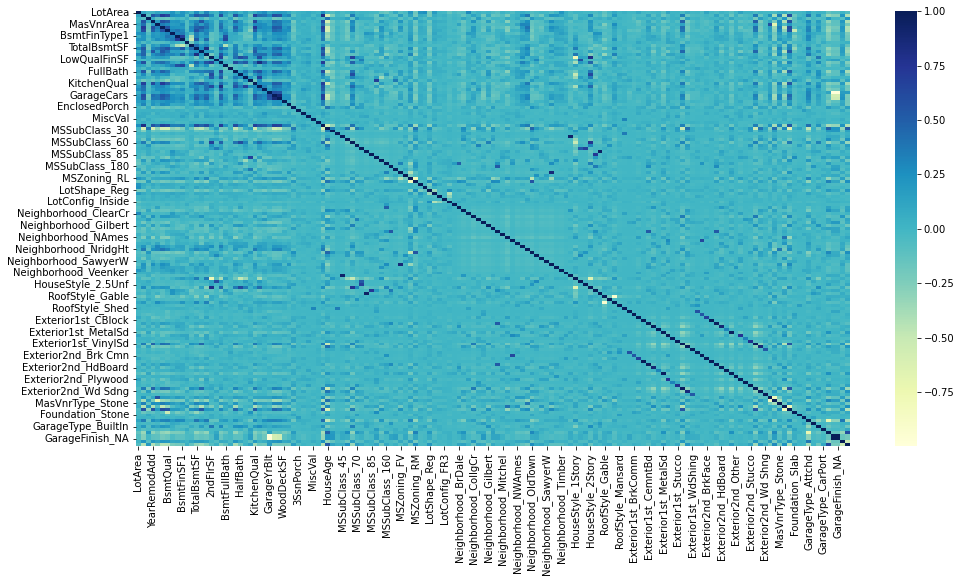

In [57]:
# plotting correlations on a heatmap

plt.figure(figsize=(16,8))
sns.heatmap(data.corr(), cmap="YlGnBu", annot=False)
plt.show()

# Data Preparation for modelling

In [58]:
data.columns

Index(['LotArea', 'OverallQual', 'OverallCond', 'YearRemodAdd', 'MasVnrArea',
       'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       ...
       'Foundation_Wood', 'GarageType_Attchd', 'GarageType_Basment',
       'GarageType_BuiltIn', 'GarageType_CarPort', 'GarageType_Detchd',
       'GarageType_NA', 'GarageFinish_NA', 'GarageFinish_RFn',
       'GarageFinish_Unf'],
      dtype='object', length=147)

In [62]:
#Get all numerical Columns
numerical_columns = data.select_dtypes(include = np.number).columns.tolist()
numerical_columns.remove('SalePrice')
numerical_columns

['LotArea',
 'OverallQual',
 'OverallCond',
 'YearRemodAdd',
 'MasVnrArea',
 'ExterQual',
 'BsmtQual',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'HeatingQC',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'HouseAge',
 'MSSubClass_30',
 'MSSubClass_40',
 'MSSubClass_45',
 'MSSubClass_50',
 'MSSubClass_60',
 'MSSubClass_70',
 'MSSubClass_75',
 'MSSubClass_80',
 'MSSubClass_85',
 'MSSubClass_90',
 'MSSubClass_120',
 'MSSubClass_160',
 'MSSubClass_180',
 'MSSubClass_190',
 'MSZoning_FV',
 'MSZoning_RH',
 'MSZoning_RL',
 'MSZoning_RM',
 'LotShape_IR2',
 'LotShape_IR3',
 'LotShape_Reg',
 'LotConfig_CulDSac',
 'LotConfig_FR2',
 'Lot

In [61]:
# Splitting into train and test set
train_data,test_data = train_test_split(data, train_size=0.7,random_state=100)
print(train_data.shape)
print(test_data.shape)

(1021, 147)
(439, 147)


In [64]:
#Rescaling Features
# Standard Scaling method
from sklearn.preprocessing import StandardScaler

#Instantiate an object
scaler = StandardScaler()

# Fit on data
train_data[numerical_columns]=scaler.fit_transform(train_data[numerical_columns])
train_data.head()

,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf
318,-0.057261,0.648310,-0.532073,0.389207,0.809137,1.051361,0.577925,2.181065,1.138412,1.159065,-0.293313,-0.454262,0.621091,0.871757,0.511410,2.137583,-0.124502,2.121655,1.066863,-0.247791,0.784821,1.244440,1.395790,-0.234155,0.741868,1.555150,0.622148,0.274068,1.646935,0.867501,1.988123,0.195951,1.912645,-0.121922,-0.275126,-0.062302,-0.084263,-0.833178,12.468437,-0.675791,-0.207125,-0.054286,-0.10436,-0.334963,2.019802,-0.207125,-0.099454,-0.209684,-0.122109,-0.207125,-0.262888,-0.217208,-0.076885,-0.158431,-0.214724,-0.113564,0.522558,-0.421455,-0.176955,-0.094304,0.760298,-0.262888,-0.176955,-0.054286,0.638965,-0.031311,-0.109055,-0.199286,-0.141351,-0.331335,-0.179878,-0.283590,-0.233992,-0.170979,-0.094304,-0.196614,-0.423065,-0.076885,-0.217208,5.307676,-0.24765,-0.289593,-0.137703,-0.224525,-0.214724,-0.24987,-0.113564,-0.148398,-0.10436,-0.113564,-0.983486,-0.062715,-0.088867,1.517962,-0.16165,-0.222108,0.507335,-0.054286,-0.478163,-0.076885,-0.044302,-0.031311,-0.044302,-0.17399,-0.031311,-0.193911,2.337098,-0.031311,-0.450101,-0.281569,-0.044302,-0.141351,-0.719088,-0.396984,-0.141351,-0.031311,-0.070152,-0.126176,-0.031311,-0.193911,2.448091,-0.088867,-0.443793,0.0,-0.324004,-0.054286,-0.141351,-0.706587,-0.388679,-0.179878,1.517962,-1.213324,-0.318437,-0.866768,1.099980,-0.133963,-0.054286,-0.044302,0.834274,-0.109055,-0.260752,-0.083086,-0.607151,-0.243164,-0.243164,1.610922,-0.852983
239,-0.169753,-0.066511,-1.448170,-1.698692,-0.558025,-0.699764,-0.533302,-0.653302,-0.753845,-0.761831,-0.293313,0.172244,-0.712611,-1.181447,-0.931882,0.793638,-0.124502,-0.058599,-0.837450,-0.247791,-1.028080,1.244440,0.17

## Training the Model

In [66]:
# Creating X_train and Y_train
y_train = train_data.pop('SalePrice')
X_train = train_data

In [67]:
X_train.head()

,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf
318,-0.057261,0.648310,-0.532073,0.389207,0.809137,1.051361,0.577925,2.181065,1.138412,1.159065,-0.293313,-0.454262,0.621091,0.871757,0.511410,2.137583,-0.124502,2.121655,1.066863,-0.247791,0.784821,1.244440,1.395790,-0.234155,0.741868,1.555150,0.622148,0.274068,1.646935,0.867501,1.988123,0.195951,1.912645,-0.121922,-0.275126,-0.062302,-0.084263,-0.833178,-0.675791,-0.207125,-0.054286,-0.10436,-0.334963,2.019802,-0.207125,-0.099454,-0.209684,-0.122109,-0.207125,-0.262888,-0.217208,-0.076885,-0.158431,-0.214724,-0.113564,0.522558,-0.421455,-0.176955,-0.094304,0.760298,-0.262888,-0.176955,-0.054286,0.638965,-0.031311,-0.109055,-0.199286,-0.141351,-0.331335,-0.179878,-0.283590,-0.233992,-0.170979,-0.094304,-0.196614,-0.423065,-0.076885,-0.217208,5.307676,-0.24765,-0.289593,-0.137703,-0.224525,-0.214724,-0.24987,-0.113564,-0.148398,-0.10436,-0.113564,-0.983486,-0.062715,-0.088867,1.517962,-0.16165,-0.222108,0.507335,-0.054286,-0.478163,-0.076885,-0.044302,-0.031311,-0.044302,-0.17399,-0.031311,-0.193911,2.337098,-0.031311,-0.450101,-0.281569,-0.044302,-0.141351,-0.719088,-0.396984,-0.141351,-0.031311,-0.070152,-0.126176,-0.031311,-0.193911,2.448091,-0.088867,-0.443793,0.0,-0.324004,-0.054286,-0.141351,-0.706587,-0.388679,-0.179878,1.517962,-1.213324,-0.318437,-0.866768,1.099980,-0.133963,-0.054286,-0.044302,0.834274,-0.109055,-0.260752,-0.083086,-0.607151,-0.243164,-0.243164,1.610922,-0.852983
239,-0.169753,-0.066511,-1.448170,-1.698692,-0.558025,-0.699764,-0.533302,-0.653302,-0.753845,-0.761831,-0.293313,0.172244,-0.712611,-1.181447,-0.931882,0.793638,-0.124502,-0.058599,-0.837450,-0.247791,-1.028080,1.244440,0.175669,-0.234155,-0.77

In [68]:
y_train.head()

318     12.468437
239     11.635143
986     11.669929
1416    11.715866
390     11.686879
Name: SalePrice, dtype: float64

## Build a Model using RFE and Automated approach

Use RFE to eliminate some columns

In [69]:
# Build a Lienar Regression model using SKLearn for RFE
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [70]:
#Cut down number of features to 30 using automated approach
from sklearn.feature_selection import RFE
rfe = RFE(lr,30)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=30)

In [71]:
#Columns selected by RFE and their weights
list(zip(X_train.columns,rfe.support_,rfe.ranking_))


[('LotArea', False, 25),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('YearRemodAdd', False, 4),
 ('MasVnrArea', False, 84),
 ('ExterQual', False, 96),
 ('BsmtQual', True, 1),
 ('BsmtExposure', False, 3),
 ('BsmtFinType1', False, 24),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', True, 1),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('HeatingQC', False, 38),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', True, 1),
 ('BsmtHalfBath', False, 59),
 ('FullBath', False, 9),
 ('HalfBath', False, 10),
 ('BedroomAbvGr', False, 87),
 ('KitchenAbvGr', False, 8),
 ('KitchenQual', True, 1),
 ('TotRmsAbvGrd', False, 12),
 ('Fireplaces', True, 1),
 ('GarageYrBlt', False, 79),
 ('GarageCars', True, 1),
 ('GarageArea', False, 62),
 ('WoodDeckSF', False, 37),
 ('OpenPorchSF', False, 86),
 ('EnclosedPorch', False, 39),
 ('3SsnPorch', False, 58),
 ('ScreenPorch', False, 36),
 ('PoolArea', True, 1),
 ('MiscVal', False, 

In [72]:
#Print Columns selected by RFE. We will start with these columns for manual elimination
X_train.columns[rfe.support_]

Index(['OverallQual', 'OverallCond', 'BsmtQual', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'KitchenQual', 'Fireplaces', 'GarageCars',
       'PoolArea', 'HouseAge', 'MSSubClass_160', 'MSZoning_FV', 'MSZoning_RH',
       'MSZoning_RL', 'MSZoning_RM', 'Neighborhood_Edwards',
       'HouseStyle_1Story', 'Exterior1st_AsphShn', 'Exterior1st_CBlock',
       'Exterior2nd_AsphShn', 'Exterior2nd_CBlock', 'GarageType_NA',
       'GarageFinish_NA'],
      dtype='object')

In [73]:
#Print Columns selected by RFE. We will start with these columns for manual elimination
X_train.columns[~rfe.support_]

Index(['LotArea', 'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'BsmtExposure',
       'BsmtFinType1', 'HeatingQC', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       ...
       'Foundation_Slab', 'Foundation_Stone', 'Foundation_Wood',
       'GarageType_Attchd', 'GarageType_Basment', 'GarageType_BuiltIn',
       'GarageType_CarPort', 'GarageType_Detchd', 'GarageFinish_RFn',
       'GarageFinish_Unf'],
      dtype='object', length=116)

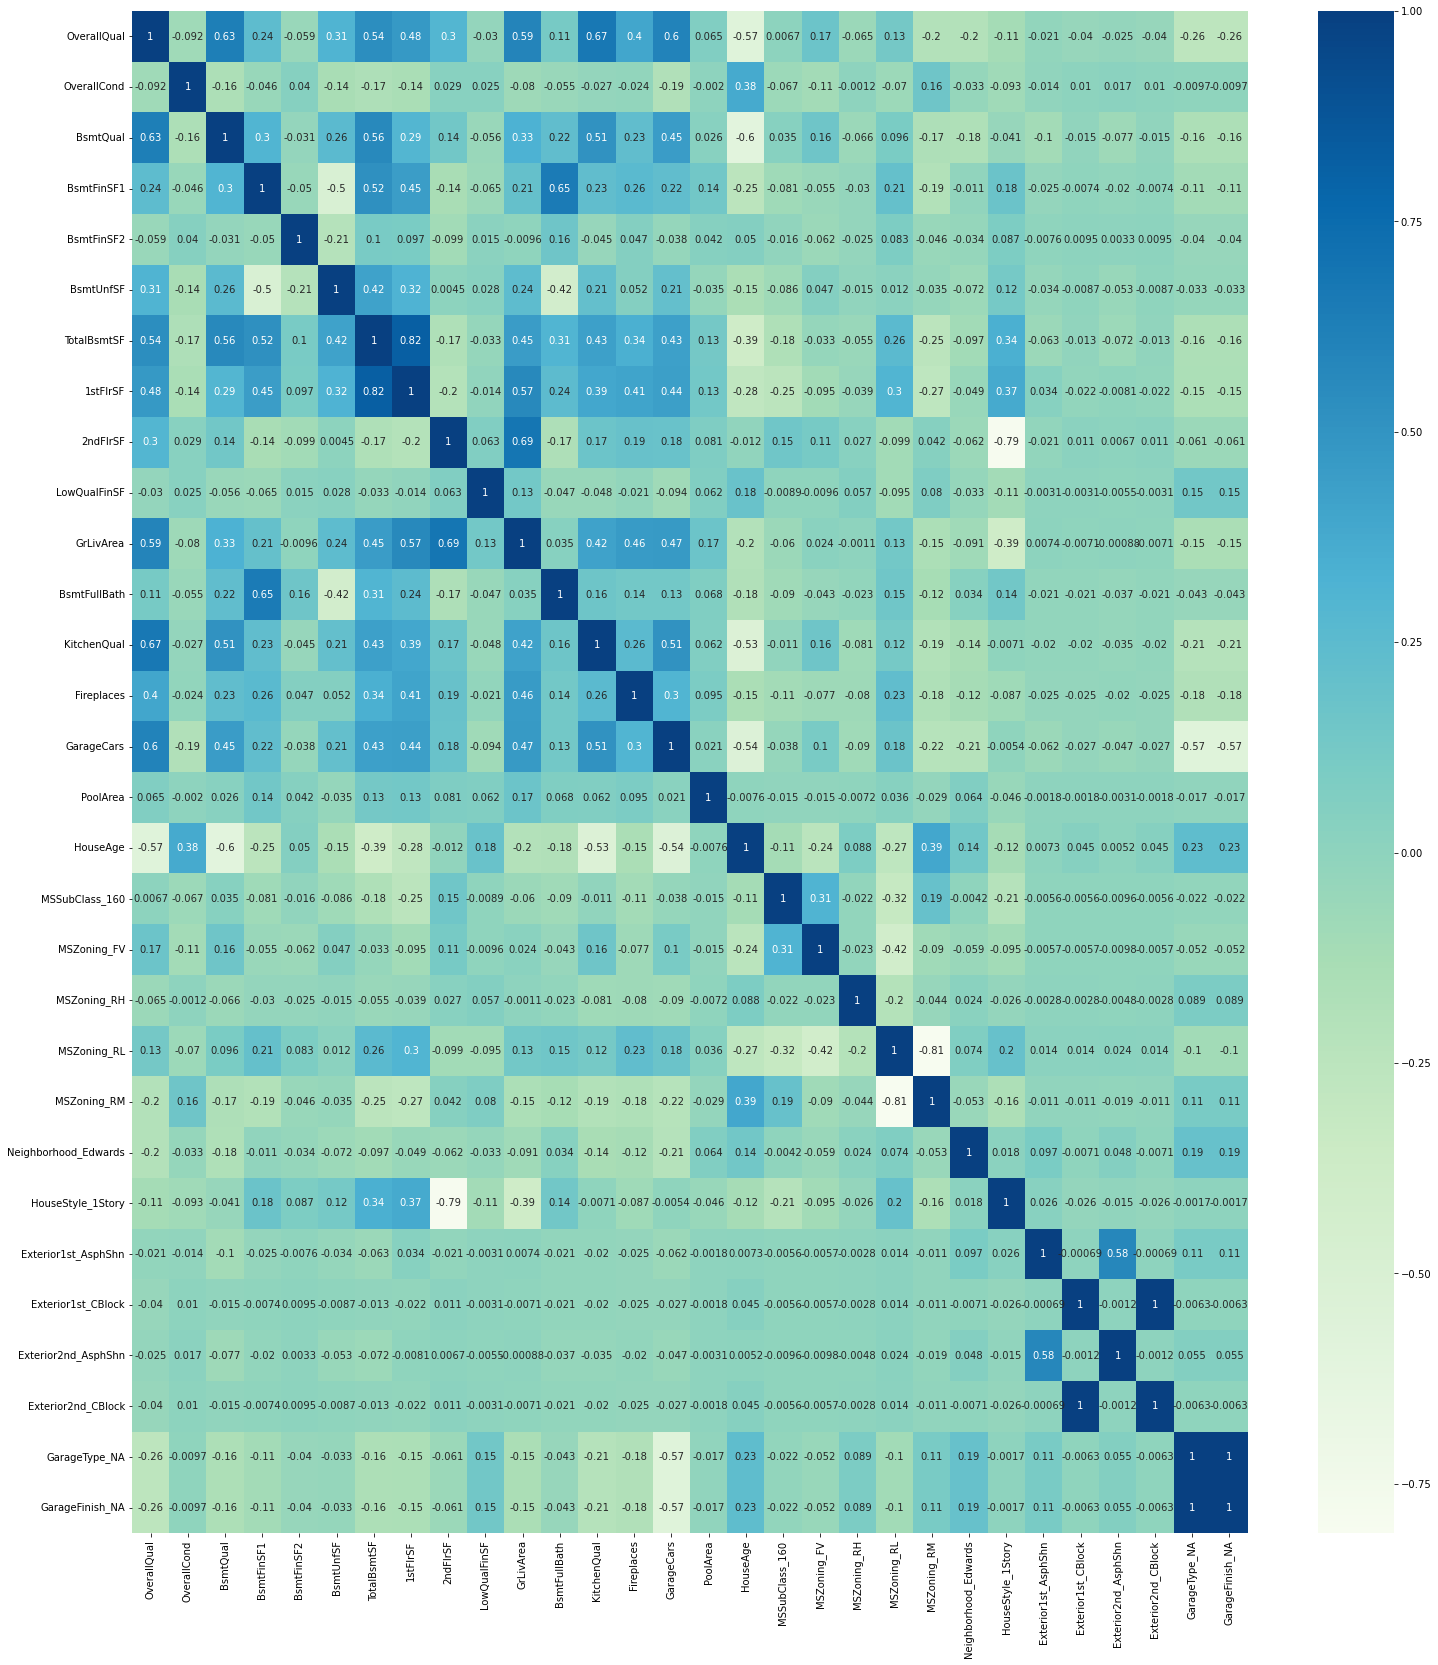

In [78]:
# Checking correlation of features selected by RFE with target column. 
# Also to check impact of different features on target.
plt.figure(figsize = (25,28))
sns.heatmap(data[['OverallQual', 'OverallCond', 'BsmtQual', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'KitchenQual', 'Fireplaces', 'GarageCars',
       'PoolArea', 'HouseAge', 'MSSubClass_160', 'MSZoning_FV', 'MSZoning_RH',
       'MSZoning_RL', 'MSZoning_RM', 'Neighborhood_Edwards',
       'HouseStyle_1Story', 'Exterior1st_AsphShn', 'Exterior1st_CBlock',
       'Exterior2nd_AsphShn', 'Exterior2nd_CBlock', 'GarageType_NA',
       'GarageFinish_NA']].corr(),cmap='GnBu', annot=True)
plt.show()

## Function to build a model using statsmodel¶

In [79]:
# top 30 columns obtained by RFE 
col = ['OverallQual', 'OverallCond', 'BsmtQual', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'KitchenQual', 'Fireplaces', 'GarageCars',
       'PoolArea', 'HouseAge', 'MSSubClass_160', 'MSZoning_FV', 'MSZoning_RH',
       'MSZoning_RL', 'MSZoning_RM', 'Neighborhood_Edwards',
       'HouseStyle_1Story', 'Exterior1st_AsphShn', 'Exterior1st_CBlock',
       'Exterior2nd_AsphShn', 'Exterior2nd_CBlock', 'GarageType_NA',
       'GarageFinish_NA']

In [80]:
# Add a constant 
X_train_sm = sm.add_constant(X_train[col])

# Create first model
lr = sm.OLS(y_train,X_train_sm)

# fit

lr_model = lr.fit()

In [81]:
lr_model.params

const                   12.023180
OverallQual              0.100852
OverallCond              0.052396
BsmtQual                 0.034573
BsmtFinSF1               0.006774
BsmtFinSF2               0.004134
BsmtUnfSF               -0.002130
TotalBsmtSF              0.006320
1stFlrSF                 0.048367
2ndFlrSF                 0.049293
LowQualFinSF             0.005907
GrLivArea                0.077084
BsmtFullBath             0.031454
KitchenQual              0.031714
Fireplaces               0.030954
GarageCars               0.053962
PoolArea                -0.027420
HouseAge                -0.067653
MSSubClass_160          -0.028509
MSZoning_FV              0.098414
MSZoning_RH              0.044471
MSZoning_RL              0.170639
MSZoning_RM              0.109443
Neighborhood_Edwards    -0.021364
HouseStyle_1Story        0.017057
Exterior1st_AsphShn     -0.000807
Exterior1st_CBlock      -0.000463
Exterior2nd_AsphShn     -0.000807
Exterior2nd_CBlock      -0.000463
GarageType_NA 

In [82]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     287.1
Date:                Mon, 09 May 2022   Prob (F-statistic):               0.00
Time:                        23:41:15   Log-Likelihood:                 570.93
No. Observations:                1021   AIC:                            -1090.
Df Residuals:                     995   BIC:                            -961.7
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   12.0232      0.004   2741.705      0.000      12.015      12.032
OverallQual              0.1009      0.008     12.519      0.000       0.085       0.117
OverallCond              0.0524      0.005     10.280      0.000       0.042       0.062
BsmtQual                 0.0346      0.008      4.596      0.000       0.020       0.049
BsmtFinSF1               0.0068      0.005      1.357      0.175      -0.003       0.017
BsmtFinSF2               0.0041      0.004      0.930      0.353      -0.005       0.013
BsmtUnfSF               -0.0021      0.005     -0.466      0.641      -0.011       0.007
TotalBsmtSF              0.0063      0.007      0.907      0.365      -0.007       0.020
1stFlrSF                 0.0484      0.007      6.584      0.000       0.034       0.063
2ndFlrSF                 0.0493      0.006      8.426      0.000       0.038       0.061
LowQualFinSF             0.0059      0.005      1.270      0.204      -0.003       0.015
GrLivArea                0.0771      0.004     17.430      0.000       0.068       0.086
BsmtFullBath             0.0315      0.006      5.156      0.000       0.019       0.043
KitchenQual              0.0317      0.006      4.990      0.000       0.019       0.044
Fireplaces               0.0310      0.005      5.780      0.000       0.020       0.041
GarageCars               0.0540      0.007      7.444      0.000       0.040       0.068
PoolArea                -0.0274      0.005     -5.829      0.000      -0.037      -0.018
HouseAge                -0.0677      0.008     -8.781      0.000      -0.083      -0.053
MSSubClass_160          -0.0285      0.005     -5.537      0.000      -0.039      -0.018
MSZoning_FV              0.0984      0.012      7.991      0.000       0.074       0.123
MSZoning_RH              0.0445      0.007      5.947      0.000       0.030       0.059
MSZoning_RL              0.1706      0.023      7.526      0.000       0.126       0.215
MSZoning_RM              0.1094      0.020      5.504      0.000       0.070       0.148
Neighborhood_Edwards    -0.0214      0.005     -4.511      0.000      -0.031      -0.012
HouseStyle_1Story        0.0171      0.008      2.187      0.029       0.002       0.032
Exterior1st_AsphShn     -0.0008      0.002     -0.355      0.722      -0.005       0.004
Exterior1st_CBlock      -0.0005      0.002     -0.210      0.834      -0.005       0.004
Exterior2nd_AsphShn     -0.0008      0.002     -0.355      0.722      -0.005       0.004
Exterior2nd_CBlock      -0.0005      0.002     -0.210      0.834      -0.005       0.004
GarageType_NA            0.0024      0.003      0.830      0.407      -0.003       0.008
GarageFinish_NA          0.0024      0.003      0.830      0.407      -0.003       0.008
=========================================================

In [83]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif= pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending = False)
vif

,Features,VIF
29,GarageFinish_NA,inf
9,LowQualFinSF,inf
24,Exterior1st_AsphShn,inf
25,Exterior1st_CBlock,inf
26,Exterior2nd_AsphShn,inf
27,Exterior2nd_CBlock,inf
10,GrLivArea,inf
8,2ndFlrSF,inf
7,1stFlrSF,inf
6,TotalBsmtSF,inf


## Model 2 
-  drop Exterior1st_CBlock col as it has high P value

In [84]:
col = ['OverallQual', 'OverallCond', 'BsmtQual', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'KitchenQual', 'Fireplaces', 'GarageCars',
       'PoolArea', 'HouseAge', 'MSSubClass_160', 'MSZoning_FV', 'MSZoning_RH',
       'MSZoning_RL', 'MSZoning_RM', 'Neighborhood_Edwards',
       'HouseStyle_1Story', 'Exterior1st_AsphShn', 
       'Exterior2nd_AsphShn', 'Exterior2nd_CBlock', 'GarageType_NA',
       'GarageFinish_NA']
# Add a constant 
X_train_sm = sm.add_constant(X_train[col])

# Create first model
lr = sm.OLS(y_train,X_train_sm)

# fit

lr_model = lr.fit()

In [85]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     287.1
Date:                Mon, 09 May 2022   Prob (F-statistic):               0.00
Time:                        23:50:11   Log-Likelihood:                 570.93
No. Observations:                1021   AIC:                            -1090.
Df Residuals:                     995   BIC:                            -961.7
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   12.0232      0.004   2741.705      0.000      12.015      12.032
OverallQual              0.1009      0.008     12.519      0.000       0.085       0.117
OverallCond              0.0524      0.005     10.280      0.000       0.042       0.062
BsmtQual                 0.0346      0.008      4.596      0.000       0.020       0.049
BsmtFinSF1               0.0068      0.005      1.357      0.175      -0.003       0.017
BsmtFinSF2               0.0041      0.004      0.930      0.353      -0.005       0.013
BsmtUnfSF               -0.0021      0.005     -0.466      0.641      -0.011       0.007
TotalBsmtSF              0.0063      0.007      0.907      0.365      -0.007       0.020
1stFlrSF                 0.0484      0.007      6.584      0.000       0.034       0.063
2ndFlrSF                 0.0493      0.006      8.426      0.000       0.038       0.061
LowQualFinSF             0.0059      0.005      1.270      0.204      -0.003       0.015
GrLivArea                0.0771      0.004     17.430      0.000       0.068       0.086
BsmtFullBath             0.0315      0.006      5.156      0.000       0.019       0.043
KitchenQual              0.0317      0.006      4.990      0.000       0.019       0.044
Fireplaces               0.0310      0.005      5.780      0.000       0.020       0.041
GarageCars               0.0540      0.007      7.444      0.000       0.040       0.068
PoolArea                -0.0274      0.005     -5.829      0.000      -0.037      -0.018
HouseAge                -0.0677      0.008     -8.781      0.000      -0.083      -0.053
MSSubClass_160          -0.0285      0.005     -5.537      0.000      -0.039      -0.018
MSZoning_FV              0.0984      0.012      7.991      0.000       0.074       0.123
MSZoning_RH              0.0445      0.007      5.947      0.000       0.030       0.059
MSZoning_RL              0.1706      0.023      7.526      0.000       0.126       0.215
MSZoning_RM              0.1094      0.020      5.504      0.000       0.070       0.148
Neighborhood_Edwards    -0.0214      0.005     -4.511      0.000      -0.031      -0.012
HouseStyle_1Story        0.0171      0.008      2.187      0.029       0.002       0.032
Exterior1st_AsphShn     -0.0008      0.002     -0.355      0.722      -0.005       0.004
Exterior2nd_AsphShn     -0.0008      0.002     -0.355      0.722      -0.005       0.004
Exterior2nd_CBlock      -0.0009      0.004     -0.210      0.834      -0.010       0.008
GarageType_NA            0.0024      0.003      0.830      0.407      -0.003       0.008
GarageFinish_NA          0.0024      0.003      0.830      0.407      -0.003       0.008
==============================================================================
Omnibus:                      615.405   Durbin-Watson:             

In [86]:
vif= pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending = False)
vif

,Features,VIF
28,GarageFinish_NA,inf
27,GarageType_NA,inf
3,BsmtFinSF1,inf
4,BsmtFinSF2,inf
5,BsmtUnfSF,inf
6,TotalBsmtSF,inf
7,1stFlrSF,inf
8,2ndFlrSF,inf
9,LowQualFinSF,inf
10,GrLivArea,inf


##  Model 3 
- drop column 'Exterior2nd_CBlock' since it got got high P value

In [87]:
col = ['OverallQual', 'OverallCond', 'BsmtQual', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'KitchenQual', 'Fireplaces', 'GarageCars',
       'PoolArea', 'HouseAge', 'MSSubClass_160', 'MSZoning_FV', 'MSZoning_RH',
       'MSZoning_RL', 'MSZoning_RM', 'Neighborhood_Edwards',
       'HouseStyle_1Story', 'Exterior1st_AsphShn', 
       'Exterior2nd_AsphShn', 'GarageType_NA',
       'GarageFinish_NA']
# Add a constant 
X_train_sm = sm.add_constant(X_train[col])

# Create first model
lr = sm.OLS(y_train,X_train_sm)

# fit

lr_model = lr.fit()

In [88]:
lr_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     299.3
Date:                Mon, 09 May 2022   Prob (F-statistic):               0.00
Time:                        23:54:55   Log-Likelihood:                 570.91
No. Observations:                1021   AIC:                            -1092.
Df Residuals:                     996   BIC:                            -968.6
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   12.0232      0.004   2743.022      0.000      12.015      12.032
OverallQual              0.1009      0.008     12.540      0.000       0.085       0.117
OverallCond              0.0524      0.005     10.292      0.000       0.042       0.062
BsmtQual                 0.0345      0.008      4.595      0.000       0.020       0.049
BsmtFinSF1               0.0067      0.005      1.352      0.177      -0.003       0.017
BsmtFinSF2               0.0041      0.004      0.928      0.353      -0.005       0.013
BsmtUnfSF               -0.0021      0.005     -0.466      0.641      -0.011       0.007
TotalBsmtSF              0.0063      0.007      0.903      0.367      -0.007       0.020
1stFlrSF                 0.0484      0.007      6.588      0.000       0.034       0.063
2ndFlrSF                 0.0493      0.006      8.429      0.000       0.038       0.061
LowQualFinSF             0.0059      0.005      1.275      0.203      -0.003       0.015
GrLivArea                0.0771      0.004     17.440      0.000       0.068       0.086
BsmtFullBath             0.0315      0.006      5.168      0.000       0.020       0.043
KitchenQual              0.0317      0.006      4.988      0.000       0.019       0.044
Fireplaces               0.0310      0.005      5.791      0.000       0.020       0.041
GarageCars               0.0540      0.007      7.452      0.000       0.040       0.068
PoolArea                -0.0274      0.005     -5.831      0.000      -0.037      -0.018
HouseAge                -0.0677      0.008     -8.809      0.000      -0.083      -0.053
MSSubClass_160          -0.0285      0.005     -5.540      0.000      -0.039      -0.018
MSZoning_FV              0.0984      0.012      7.993      0.000       0.074       0.123
MSZoning_RH              0.0445      0.007      5.948      0.000       0.030       0.059
MSZoning_RL              0.1705      0.023      7.527      0.000       0.126       0.215
MSZoning_RM              0.1094      0.020      5.506      0.000       0.070       0.148
Neighborhood_Edwards    -0.0213      0.005     -4.509      0.000      -0.031      -0.012
HouseStyle_1Story        0.0171      0.008      2.195      0.028       0.002       0.032
Exterior1st_AsphShn     -0.0008      0.002     -0.358      0.721      -0.005       0.004
Exterior2nd_AsphShn     -0.0008      0.002     -0.358      0.721      -0.005       0.004
GarageType_NA            0.0024      0.003      0.836      0.403      -0.003       0.008
GarageFinish_NA          0.0024      0.003      0.836      0.403      -0.003       0.008
==============================================================================
Omnibus:                      615.161   Durbin-Watson:                   1.942
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            22942.41

In [89]:
vif= pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending = False)
vif

,Features,VIF
27,GarageFinish_NA,inf
26,GarageType_NA,inf
3,BsmtFinSF1,inf
4,BsmtFinSF2,inf
5,BsmtUnfSF,inf
6,TotalBsmtSF,inf
7,1stFlrSF,inf
8,2ndFlrSF,inf
9,LowQualFinSF,inf
10,GrLivArea,inf


## Model 4
- drop column 'Exterior1st_AsphShn' as it has got high P value

In [90]:
col = ['OverallQual', 'OverallCond', 'BsmtQual', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'KitchenQual', 'Fireplaces', 'GarageCars',
       'PoolArea', 'HouseAge', 'MSSubClass_160', 'MSZoning_FV', 'MSZoning_RH',
       'MSZoning_RL', 'MSZoning_RM', 'Neighborhood_Edwards',
       'HouseStyle_1Story', 
       'Exterior2nd_AsphShn', 'GarageType_NA',
       'GarageFinish_NA']
# Add a constant 
X_train_sm = sm.add_constant(X_train[col])

# Create first model
lr = sm.OLS(y_train,X_train_sm)

# fit

lr_model = lr.fit()

In [91]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     299.3
Date:                Mon, 09 May 2022   Prob (F-statistic):               0.00
Time:                        23:58:19   Log-Likelihood:                 570.91
No. Observations:                1021   AIC:                            -1092.
Df Residuals:                     996   BIC:                            -968.6
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   12.0232      0.004   2743.022      0.000      12.015      12.032
OverallQual              0.1009      0.008     12.540      0.000       0.085       0.117
OverallCond              0.0524      0.005     10.292      0.000       0.042       0.062
BsmtQual                 0.0345      0.008      4.595      0.000       0.020       0.049
BsmtFinSF1               0.0067      0.005      1.352      0.177      -0.003       0.017
BsmtFinSF2               0.0041      0.004      0.928      0.353      -0.005       0.013
BsmtUnfSF               -0.0021      0.005     -0.466      0.641      -0.011       0.007
TotalBsmtSF              0.0063      0.007      0.903      0.367      -0.007       0.020
1stFlrSF                 0.0484      0.007      6.588      0.000       0.034       0.063
2ndFlrSF                 0.0493      0.006      8.429      0.000       0.038       0.061
LowQualFinSF             0.0059      0.005      1.275      0.203      -0.003       0.015
GrLivArea                0.0771      0.004     17.440      0.000       0.068       0.086
BsmtFullBath             0.0315      0.006      5.168      0.000       0.020       0.043
KitchenQual              0.0317      0.006      4.988      0.000       0.019       0.044
Fireplaces               0.0310      0.005      5.791      0.000       0.020       0.041
GarageCars               0.0540      0.007      7.452      0.000       0.040       0.068
PoolArea                -0.0274      0.005     -5.831      0.000      -0.037      -0.018
HouseAge                -0.0677      0.008     -8.809      0.000      -0.083      -0.053
MSSubClass_160          -0.0285      0.005     -5.540      0.000      -0.039      -0.018
MSZoning_FV              0.0984      0.012      7.993      0.000       0.074       0.123
MSZoning_RH              0.0445      0.007      5.948      0.000       0.030       0.059
MSZoning_RL              0.1705      0.023      7.527      0.000       0.126       0.215
MSZoning_RM              0.1094      0.020      5.506      0.000       0.070       0.148
Neighborhood_Edwards    -0.0213      0.005     -4.509      0.000      -0.031      -0.012
HouseStyle_1Story        0.0171      0.008      2.195      0.028       0.002       0.032
Exterior2nd_AsphShn     -0.0016      0.005     -0.358      0.721      -0.011       0.007
GarageType_NA            0.0024      0.003      0.836      0.403      -0.003       0.008
GarageFinish_NA          0.0024      0.003      0.836      0.403      -0.003       0.008
==============================================================================
Omnibus:                      615.161   Durbin-Watson:                   1.942
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            22942.415
Skew:                          -2.154   Prob(JB):                         0.00
Kurtosis

## Model 5
- drop column 'Exterior2nd_AsphShn' as it has got high P value

In [92]:
col = ['OverallQual', 'OverallCond', 'BsmtQual', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'KitchenQual', 'Fireplaces', 'GarageCars',
       'PoolArea', 'HouseAge', 'MSSubClass_160', 'MSZoning_FV', 'MSZoning_RH',
       'MSZoning_RL', 'MSZoning_RM', 'Neighborhood_Edwards',
       'HouseStyle_1Story', 
        'GarageType_NA',
       'GarageFinish_NA']
# Add a constant 
X_train_sm = sm.add_constant(X_train[col])

# Create first model
lr = sm.OLS(y_train,X_train_sm)

# fit

lr_model = lr.fit()

In [93]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     312.6
Date:                Tue, 10 May 2022   Prob (F-statistic):               0.00
Time:                        00:03:02   Log-Likelihood:                 570.84
No. Observations:                1021   AIC:                            -1094.
Df Residuals:                     997   BIC:                            -975.4
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   12.0232      0.004   2744.222      0.000      12.015      12.032
OverallQual              0.1008      0.008     12.544      0.000       0.085       0.117
OverallCond              0.0524      0.005     10.297      0.000       0.042       0.062
BsmtQual                 0.0347      0.008      4.622      0.000       0.020       0.049
BsmtFinSF1               0.0069      0.005      1.384      0.167      -0.003       0.017
BsmtFinSF2               0.0042      0.004      0.939      0.348      -0.005       0.013
BsmtUnfSF               -0.0020      0.005     -0.435      0.664      -0.011       0.007
TotalBsmtSF              0.0066      0.007      0.954      0.340      -0.007       0.020
1stFlrSF                 0.0480      0.007      6.598      0.000       0.034       0.062
2ndFlrSF                 0.0494      0.006      8.465      0.000       0.038       0.061
LowQualFinSF             0.0060      0.005      1.282      0.200      -0.003       0.015
GrLivArea                0.0769      0.004     17.491      0.000       0.068       0.086
BsmtFullBath             0.0315      0.006      5.172      0.000       0.020       0.043
KitchenQual              0.0317      0.006      4.994      0.000       0.019       0.044
Fireplaces               0.0310      0.005      5.803      0.000       0.021       0.042
GarageCars               0.0540      0.007      7.466      0.000       0.040       0.068
PoolArea                -0.0274      0.005     -5.835      0.000      -0.037      -0.018
HouseAge                -0.0676      0.008     -8.807      0.000      -0.083      -0.053
MSSubClass_160          -0.0285      0.005     -5.541      0.000      -0.039      -0.018
MSZoning_FV              0.0984      0.012      7.997      0.000       0.074       0.123
MSZoning_RH              0.0445      0.007      5.958      0.000       0.030       0.059
MSZoning_RL              0.1706      0.023      7.532      0.000       0.126       0.215
MSZoning_RM              0.1094      0.020      5.509      0.000       0.070       0.148
Neighborhood_Edwards    -0.0215      0.005     -4.553      0.000      -0.031      -0.012
HouseStyle_1Story        0.0171      0.008      2.192      0.029       0.002       0.032
GarageType_NA            0.0023      0.003      0.806      0.420      -0.003       0.008
GarageFinish_NA          0.0023      0.003      0.806      0.420      -0.003       0.008
==============================================================================
Omnibus:                      614.679   Durbin-Watson:                   1.942
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            22917.584
Skew:                          -2.151   Prob(JB):                         0.00
Kurtosis:                      25.808   Cond. No.                     1.91e+16
==================

In [94]:
vif= pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending = False)
vif

,Features,VIF
25,GarageFinish_NA,inf
24,GarageType_NA,inf
3,BsmtFinSF1,inf
4,BsmtFinSF2,inf
5,BsmtUnfSF,inf
6,TotalBsmtSF,inf
7,1stFlrSF,inf
8,2ndFlrSF,inf
9,LowQualFinSF,inf
10,GrLivArea,inf


## Model 6
- drop column 'BsmtUnfSF' as it has got high p- value

In [96]:
col = ['OverallQual', 'OverallCond', 'BsmtQual', 'BsmtFinSF1', 'BsmtFinSF2',
        'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'KitchenQual', 'Fireplaces', 'GarageCars',
       'PoolArea', 'HouseAge', 'MSSubClass_160', 'MSZoning_FV', 'MSZoning_RH',
       'MSZoning_RL', 'MSZoning_RM', 'Neighborhood_Edwards',
       'HouseStyle_1Story', 
        'GarageType_NA',
       'GarageFinish_NA']
# Add a constant 
X_train_sm = sm.add_constant(X_train[col])

# Create first model
lr = sm.OLS(y_train,X_train_sm)

# fit

lr_model = lr.fit()

In [97]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     312.6
Date:                Tue, 10 May 2022   Prob (F-statistic):               0.00
Time:                        00:09:03   Log-Likelihood:                 570.84
No. Observations:                1021   AIC:                            -1094.
Df Residuals:                     997   BIC:                            -975.4
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   12.0232      0.004   2744.222      0.000      12.015      12.032
OverallQual              0.1008      0.008     12.544      0.000       0.085       0.117
OverallCond              0.0524      0.005     10.297      0.000       0.042       0.062
BsmtQual                 0.0347      0.008      4.622      0.000       0.020       0.049
BsmtFinSF1               0.0089      0.007      1.285      0.199      -0.005       0.023
BsmtFinSF2               0.0049      0.005      1.033      0.302      -0.004       0.014
TotalBsmtSF              0.0046      0.010      0.437      0.662      -0.016       0.025
1stFlrSF                 0.0480      0.007      6.598      0.000       0.034       0.062
2ndFlrSF                 0.0494      0.006      8.465      0.000       0.038       0.061
LowQualFinSF             0.0060      0.005      1.282      0.200      -0.003       0.015
GrLivArea                0.0769      0.004     17.491      0.000       0.068       0.086
BsmtFullBath             0.0315      0.006      5.172      0.000       0.020       0.043
KitchenQual              0.0317      0.006      4.994      0.000       0.019       0.044
Fireplaces               0.0310      0.005      5.803      0.000       0.021       0.042
GarageCars               0.0540      0.007      7.466      0.000       0.040       0.068
PoolArea                -0.0274      0.005     -5.835      0.000      -0.037      -0.018
HouseAge                -0.0676      0.008     -8.807      0.000      -0.083      -0.053
MSSubClass_160          -0.0285      0.005     -5.541      0.000      -0.039      -0.018
MSZoning_FV              0.0984      0.012      7.997      0.000       0.074       0.123
MSZoning_RH              0.0445      0.007      5.958      0.000       0.030       0.059
MSZoning_RL              0.1706      0.023      7.532      0.000       0.126       0.215
MSZoning_RM              0.1094      0.020      5.509      0.000       0.070       0.148
Neighborhood_Edwards    -0.0215      0.005     -4.553      0.000      -0.031      -0.012
HouseStyle_1Story        0.0171      0.008      2.192      0.029       0.002       0.032
GarageType_NA            0.0023      0.003      0.806      0.420      -0.003       0.008
GarageFinish_NA          0.0023      0.003      0.806      0.420      -0.003       0.008
==============================================================================
Omnibus:                      614.679   Durbin-Watson:                   1.942
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            22917.584
Skew:                          -2.151   Prob(JB):                         0.00
Kurtosis:                      25.808   Cond. No.                     1.45e+16
==============================================================================

Notes:
[1] Standard Errors 

In [98]:
vif= pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending = False)
vif

,Features,VIF
24,GarageFinish_NA,inf
23,GarageType_NA,inf
6,1stFlrSF,inf
7,2ndFlrSF,inf
8,LowQualFinSF,inf
9,GrLivArea,inf
19,MSZoning_RL,26.72
20,MSZoning_RM,20.56
17,MSZoning_FV,7.88
5,TotalBsmtSF,5.70


## Model 7
- drop column 'TotalBsmtSF' as it has got high p - value

In [99]:
col = ['OverallQual', 'OverallCond', 'BsmtQual', 'BsmtFinSF1', 'BsmtFinSF2',
         '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'KitchenQual', 'Fireplaces', 'GarageCars',
       'PoolArea', 'HouseAge', 'MSSubClass_160', 'MSZoning_FV', 'MSZoning_RH',
       'MSZoning_RL', 'MSZoning_RM', 'Neighborhood_Edwards',
       'HouseStyle_1Story', 
        'GarageType_NA',
       'GarageFinish_NA']
# Add a constant 
X_train_sm = sm.add_constant(X_train[col])

# Create first model
lr = sm.OLS(y_train,X_train_sm)

# fit

lr_model = lr.fit()

In [100]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     327.1
Date:                Tue, 10 May 2022   Prob (F-statistic):               0.00
Time:                        00:13:33   Log-Likelihood:                 570.75
No. Observations:                1021   AIC:                            -1095.
Df Residuals:                     998   BIC:                            -982.1
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   12.0232      0.004   2745.335      0.000      12.015      12.032
OverallQual              0.1010      0.008     12.603      0.000       0.085       0.117
OverallCond              0.0522      0.005     10.307      0.000       0.042       0.062
BsmtQual                 0.0365      0.006      5.800      0.000       0.024       0.049
BsmtFinSF1               0.0097      0.007      1.438      0.151      -0.004       0.023
BsmtFinSF2               0.0052      0.005      1.101      0.271      -0.004       0.014
1stFlrSF                 0.0501      0.005      9.164      0.000       0.039       0.061
2ndFlrSF                 0.0486      0.006      8.771      0.000       0.038       0.059
LowQualFinSF             0.0059      0.005      1.275      0.203      -0.003       0.015
GrLivArea                0.0779      0.004     20.127      0.000       0.070       0.085
BsmtFullBath             0.0313      0.006      5.156      0.000       0.019       0.043
KitchenQual              0.0317      0.006      4.991      0.000       0.019       0.044
Fireplaces               0.0309      0.005      5.789      0.000       0.020       0.041
GarageCars               0.0539      0.007      7.459      0.000       0.040       0.068
PoolArea                -0.0272      0.005     -5.822      0.000      -0.036      -0.018
HouseAge                -0.0672      0.008     -8.814      0.000      -0.082      -0.052
MSSubClass_160          -0.0285      0.005     -5.539      0.000      -0.039      -0.018
MSZoning_FV              0.0984      0.012      8.005      0.000       0.074       0.123
MSZoning_RH              0.0445      0.007      5.961      0.000       0.030       0.059
MSZoning_RL              0.1708      0.023      7.546      0.000       0.126       0.215
MSZoning_RM              0.1096      0.020      5.522      0.000       0.071       0.149
Neighborhood_Edwards    -0.0215      0.005     -4.559      0.000      -0.031      -0.012
HouseStyle_1Story        0.0175      0.008      2.262      0.024       0.002       0.033
GarageType_NA            0.0023      0.003      0.806      0.421      -0.003       0.008
GarageFinish_NA          0.0023      0.003      0.806      0.421      -0.003       0.008
==============================================================================
Omnibus:                      606.527   Durbin-Watson:                   1.942
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            21859.091
Skew:                          -2.119   Prob(JB):                         0.00
Kurtosis:                      25.268   Cond. No.                     1.13e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest 

In [101]:
vif= pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending = False)
vif

,Features,VIF
23,GarageFinish_NA,inf
22,GarageType_NA,inf
5,1stFlrSF,inf
6,2ndFlrSF,inf
7,LowQualFinSF,inf
8,GrLivArea,inf
18,MSZoning_RL,26.71
19,MSZoning_RM,20.55
16,MSZoning_FV,7.88
0,OverallQual,3.35


# Model 8
- drop the column 'GarageFinish_NA' as it has got both high P- value and high VIF

In [102]:
col = ['OverallQual', 'OverallCond', 'BsmtQual', 'BsmtFinSF1', 'BsmtFinSF2',
         '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'KitchenQual', 'Fireplaces', 'GarageCars',
       'PoolArea', 'HouseAge', 'MSSubClass_160', 'MSZoning_FV', 'MSZoning_RH',
       'MSZoning_RL', 'MSZoning_RM', 'Neighborhood_Edwards',
       'HouseStyle_1Story', 
        'GarageType_NA']
# Add a constant 
X_train_sm = sm.add_constant(X_train[col])

# Create first model
lr = sm.OLS(y_train,X_train_sm)

# fit

lr_model = lr.fit()

In [103]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     327.1
Date:                Tue, 10 May 2022   Prob (F-statistic):               0.00
Time:                        00:18:35   Log-Likelihood:                 570.75
No. Observations:                1021   AIC:                            -1095.
Df Residuals:                     998   BIC:                            -982.1
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   12.0232      0.004   2745.335      0.000      12.015      12.032
OverallQual              0.1010      0.008     12.603      0.000       0.085       0.117
OverallCond              0.0522      0.005     10.307      0.000       0.042       0.062
BsmtQual                 0.0365      0.006      5.800      0.000       0.024       0.049
BsmtFinSF1               0.0097      0.007      1.438      0.151      -0.004       0.023
BsmtFinSF2               0.0052      0.005      1.101      0.271      -0.004       0.014
1stFlrSF                 0.0501      0.005      9.164      0.000       0.039       0.061
2ndFlrSF                 0.0486      0.006      8.771      0.000       0.038       0.059
LowQualFinSF             0.0059      0.005      1.275      0.203      -0.003       0.015
GrLivArea                0.0779      0.004     20.127      0.000       0.070       0.085
BsmtFullBath             0.0313      0.006      5.156      0.000       0.019       0.043
KitchenQual              0.0317      0.006      4.991      0.000       0.019       0.044
Fireplaces               0.0309      0.005      5.789      0.000       0.020       0.041
GarageCars               0.0539      0.007      7.459      0.000       0.040       0.068
PoolArea                -0.0272      0.005     -5.822      0.000      -0.036      -0.018
HouseAge                -0.0672      0.008     -8.814      0.000      -0.082      -0.052
MSSubClass_160          -0.0285      0.005     -5.539      0.000      -0.039      -0.018
MSZoning_FV              0.0984      0.012      8.005      0.000       0.074       0.123
MSZoning_RH              0.0445      0.007      5.961      0.000       0.030       0.059
MSZoning_RL              0.1708      0.023      7.546      0.000       0.126       0.215
MSZoning_RM              0.1096      0.020      5.522      0.000       0.071       0.149
Neighborhood_Edwards    -0.0215      0.005     -4.559      0.000      -0.031      -0.012
HouseStyle_1Story        0.0175      0.008      2.262      0.024       0.002       0.033
GarageType_NA            0.0046      0.006      0.806      0.421      -0.007       0.016
==============================================================================
Omnibus:                      606.527   Durbin-Watson:                   1.942
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            21859.091
Skew:                          -2.119   Prob(JB):                         0.00
Kurtosis:                      25.268   Cond. No.                     6.48e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.21e-28. This might indicate that there are
strong multicollinearity probl

In [104]:
vif= pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending = False)
vif

,Features,VIF
5,1stFlrSF,inf
6,2ndFlrSF,inf
7,LowQualFinSF,inf
8,GrLivArea,inf
18,MSZoning_RL,26.71
19,MSZoning_RM,20.55
16,MSZoning_FV,7.88
0,OverallQual,3.35
21,HouseStyle_1Story,3.11
14,HouseAge,3.03


## Model 9 
- drop column 'LowQualFinSF' as it has got both high p-value and high VIF

In [105]:
col = ['OverallQual', 'OverallCond', 'BsmtQual', 'BsmtFinSF1', 'BsmtFinSF2',
         '1stFlrSF', '2ndFlrSF', 
       'GrLivArea', 'BsmtFullBath', 'KitchenQual', 'Fireplaces', 'GarageCars',
       'PoolArea', 'HouseAge', 'MSSubClass_160', 'MSZoning_FV', 'MSZoning_RH',
       'MSZoning_RL', 'MSZoning_RM', 'Neighborhood_Edwards',
       'HouseStyle_1Story', 
        'GarageType_NA']
# Add a constant 
X_train_sm = sm.add_constant(X_train[col])

# Create first model
lr = sm.OLS(y_train,X_train_sm)

# fit

lr_model = lr.fit()

In [106]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     327.1
Date:                Tue, 10 May 2022   Prob (F-statistic):               0.00
Time:                        00:28:18   Log-Likelihood:                 570.75
No. Observations:                1021   AIC:                            -1095.
Df Residuals:                     998   BIC:                            -982.1
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   12.0232      0.004   2745.335      0.000      12.015      12.032
OverallQual              0.1010      0.008     12.603      0.000       0.085       0.117
OverallCond              0.0522      0.005     10.307      0.000       0.042       0.062
BsmtQual                 0.0365      0.006      5.800      0.000       0.024       0.049
BsmtFinSF1               0.0097      0.007      1.438      0.151      -0.004       0.023
BsmtFinSF2               0.0052      0.005      1.101      0.271      -0.004       0.014
1stFlrSF                 0.0013      0.039      0.033      0.974      -0.076       0.079
2ndFlrSF                -0.0049      0.042     -0.115      0.908      -0.088       0.078
GrLivArea                0.1432      0.051      2.790      0.005       0.042       0.244
BsmtFullBath             0.0313      0.006      5.156      0.000       0.019       0.043
KitchenQual              0.0317      0.006      4.991      0.000       0.019       0.044
Fireplaces               0.0309      0.005      5.789      0.000       0.020       0.041
GarageCars               0.0539      0.007      7.459      0.000       0.040       0.068
PoolArea                -0.0272      0.005     -5.822      0.000      -0.036      -0.018
HouseAge                -0.0672      0.008     -8.814      0.000      -0.082      -0.052
MSSubClass_160          -0.0285      0.005     -5.539      0.000      -0.039      -0.018
MSZoning_FV              0.0984      0.012      8.005      0.000       0.074       0.123
MSZoning_RH              0.0445      0.007      5.961      0.000       0.030       0.059
MSZoning_RL              0.1708      0.023      7.546      0.000       0.126       0.215
MSZoning_RM              0.1096      0.020      5.522      0.000       0.071       0.149
Neighborhood_Edwards    -0.0215      0.005     -4.559      0.000      -0.031      -0.012
HouseStyle_1Story        0.0175      0.008      2.262      0.024       0.002       0.033
GarageType_NA            0.0046      0.006      0.806      0.421      -0.007       0.016
==============================================================================
Omnibus:                      606.527   Durbin-Watson:                   1.942
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            21859.091
Skew:                          -2.119   Prob(JB):                         0.00
Kurtosis:                      25.268   Cond. No.                         39.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [107]:
vif= pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending = False)
vif

,Features,VIF
7,GrLivArea,137.27
6,2ndFlrSF,92.86
5,1stFlrSF,81.06
17,MSZoning_RL,26.71
18,MSZoning_RM,20.55
15,MSZoning_FV,7.88
0,OverallQual,3.35
20,HouseStyle_1Story,3.11
13,HouseAge,3.03
16,MSZoning_RH,2.91


## Model 10
- drop the column '1stFlrSF' as it has got both high p- value and high VIF

In [108]:
col = ['OverallQual', 'OverallCond', 'BsmtQual', 'BsmtFinSF1', 'BsmtFinSF2',
          '2ndFlrSF', 
       'GrLivArea', 'BsmtFullBath', 'KitchenQual', 'Fireplaces', 'GarageCars',
       'PoolArea', 'HouseAge', 'MSSubClass_160', 'MSZoning_FV', 'MSZoning_RH',
       'MSZoning_RL', 'MSZoning_RM', 'Neighborhood_Edwards',
       'HouseStyle_1Story', 
        'GarageType_NA']
# Add a constant 
X_train_sm = sm.add_constant(X_train[col])

# Create first model
lr = sm.OLS(y_train,X_train_sm)

# fit

lr_model = lr.fit()

In [109]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     343.0
Date:                Tue, 10 May 2022   Prob (F-statistic):               0.00
Time:                        00:31:52   Log-Likelihood:                 570.75
No. Observations:                1021   AIC:                            -1097.
Df Residuals:                     999   BIC:                            -989.1
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   12.0232      0.004   2746.709      0.000      12.015      12.032
OverallQual              0.1010      0.008     12.618      0.000       0.085       0.117
OverallCond              0.0522      0.005     10.321      0.000       0.042       0.062
BsmtQual                 0.0365      0.006      5.814      0.000       0.024       0.049
BsmtFinSF1               0.0097      0.007      1.452      0.147      -0.003       0.023
BsmtFinSF2               0.0052      0.005      1.103      0.270      -0.004       0.014
2ndFlrSF                -0.0062      0.010     -0.617      0.538      -0.026       0.014
GrLivArea                0.1448      0.009     15.900      0.000       0.127       0.163
BsmtFullBath             0.0313      0.006      5.160      0.000       0.019       0.043
KitchenQual              0.0317      0.006      4.994      0.000       0.019       0.044
Fireplaces               0.0309      0.005      5.819      0.000       0.020       0.041
GarageCars               0.0540      0.007      7.472      0.000       0.040       0.068
PoolArea                -0.0272      0.005     -5.861      0.000      -0.036      -0.018
HouseAge                -0.0673      0.008     -8.879      0.000      -0.082      -0.052
MSSubClass_160          -0.0285      0.005     -5.547      0.000      -0.039      -0.018
MSZoning_FV              0.0985      0.012      8.025      0.000       0.074       0.123
MSZoning_RH              0.0445      0.007      5.971      0.000       0.030       0.059
MSZoning_RL              0.1709      0.023      7.576      0.000       0.127       0.215
MSZoning_RM              0.1097      0.020      5.549      0.000       0.071       0.148
Neighborhood_Edwards    -0.0215      0.005     -4.582      0.000      -0.031      -0.012
HouseStyle_1Story        0.0175      0.008      2.295      0.022       0.003       0.032
GarageType_NA            0.0046      0.006      0.807      0.420      -0.007       0.016
==============================================================================
Omnibus:                      606.276   Durbin-Watson:                   1.942
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            21830.266
Skew:                          -2.118   Prob(JB):                         0.00
Kurtosis:                      25.253   Cond. No.                         15.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [110]:
vif= pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending = False)
vif

,Features,VIF
16,MSZoning_RL,26.55
17,MSZoning_RM,20.39
14,MSZoning_FV,7.86
5,2ndFlrSF,5.29
6,GrLivArea,4.33
0,OverallQual,3.34
19,HouseStyle_1Story,3.04
12,HouseAge,2.99
15,MSZoning_RH,2.90
10,GarageCars,2.72


## Model 11
- drop column '2ndFlrSF' as it has got both high p-value and high VIF

In [111]:
col = ['OverallQual', 'OverallCond', 'BsmtQual', 'BsmtFinSF1', 'BsmtFinSF2',
           
       'GrLivArea', 'BsmtFullBath', 'KitchenQual', 'Fireplaces', 'GarageCars',
       'PoolArea', 'HouseAge', 'MSSubClass_160', 'MSZoning_FV', 'MSZoning_RH',
       'MSZoning_RL', 'MSZoning_RM', 'Neighborhood_Edwards',
       'HouseStyle_1Story', 
        'GarageType_NA']
# Add a constant 
X_train_sm = sm.add_constant(X_train[col])

# Create first model
lr = sm.OLS(y_train,X_train_sm)

# fit

lr_model = lr.fit()

In [113]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     360.3
Date:                Tue, 10 May 2022   Prob (F-statistic):               0.00
Time:                        00:38:19   Log-Likelihood:                 570.55
No. Observations:                1021   AIC:                            -1099.
Df Residuals:                    1000   BIC:                            -995.6
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   12.0232      0.004   2747.561      0.000      12.015      12.032
OverallQual              0.1014      0.008     12.703      0.000       0.086       0.117
OverallCond              0.0520      0.005     10.306      0.000       0.042       0.062
BsmtQual                 0.0364      0.006      5.801      0.000       0.024       0.049
BsmtFinSF1               0.0106      0.007      1.630      0.103      -0.002       0.023
BsmtFinSF2               0.0056      0.005      1.193      0.233      -0.004       0.015
GrLivArea                0.1412      0.007     20.364      0.000       0.128       0.155
BsmtFullBath             0.0312      0.006      5.151      0.000       0.019       0.043
KitchenQual              0.0319      0.006      5.037      0.000       0.019       0.044
Fireplaces               0.0312      0.005      5.910      0.000       0.021       0.042
GarageCars               0.0542      0.007      7.509      0.000       0.040       0.068
PoolArea                -0.0273      0.005     -5.871      0.000      -0.036      -0.018
HouseAge                -0.0669      0.008     -8.861      0.000      -0.082      -0.052
MSSubClass_160          -0.0288      0.005     -5.623      0.000      -0.039      -0.019
MSZoning_FV              0.0983      0.012      8.018      0.000       0.074       0.122
MSZoning_RH              0.0445      0.007      5.975      0.000       0.030       0.059
MSZoning_RL              0.1709      0.023      7.579      0.000       0.127       0.215
MSZoning_RM              0.1097      0.020      5.552      0.000       0.071       0.148
Neighborhood_Edwards    -0.0214      0.005     -4.568      0.000      -0.031      -0.012
HouseStyle_1Story        0.0208      0.005      3.847      0.000       0.010       0.031
GarageType_NA            0.0047      0.006      0.831      0.406      -0.006       0.016
==============================================================================
Omnibus:                      597.951   Durbin-Watson:                   1.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            20969.397
Skew:                          -2.083   Prob(JB):                         0.00
Kurtosis:                      24.807   Cond. No.                         15.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [114]:
vif= pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending = False)
vif

,Features,VIF
15,MSZoning_RL,26.55
16,MSZoning_RM,20.39
13,MSZoning_FV,7.85
0,OverallQual,3.33
11,HouseAge,2.98
14,MSZoning_RH,2.90
9,GarageCars,2.72
5,GrLivArea,2.51
3,BsmtFinSF1,2.22
7,KitchenQual,2.09


## Model 12 
- drop the column ' GarageType_NA' as it has got high p- value 

In [115]:
col = ['OverallQual', 'OverallCond', 'BsmtQual', 'BsmtFinSF1', 'BsmtFinSF2',
           
       'GrLivArea', 'BsmtFullBath', 'KitchenQual', 'Fireplaces', 'GarageCars',
       'PoolArea', 'HouseAge', 'MSSubClass_160', 'MSZoning_FV', 'MSZoning_RH',
       'MSZoning_RL', 'MSZoning_RM', 'Neighborhood_Edwards',
       'HouseStyle_1Story']
# Add a constant 
X_train_sm = sm.add_constant(X_train[col])

# Create first model
lr = sm.OLS(y_train,X_train_sm)

# fit

lr_model = lr.fit()

In [116]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     379.4
Date:                Tue, 10 May 2022   Prob (F-statistic):               0.00
Time:                        00:43:11   Log-Likelihood:                 570.20
No. Observations:                1021   AIC:                            -1100.
Df Residuals:                    1001   BIC:                            -1002.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   12.0232      0.004   2747.986      0.000      12.015      12.032
OverallQual              0.1014      0.008     12.713      0.000       0.086       0.117
OverallCond              0.0514      0.005     10.295      0.000       0.042       0.061
BsmtQual                 0.0366      0.006      5.850      0.000       0.024       0.049
BsmtFinSF1               0.0103      0.006      1.578      0.115      -0.002       0.023
BsmtFinSF2               0.0053      0.005      1.135      0.257      -0.004       0.014
GrLivArea                0.1422      0.007     20.824      0.000       0.129       0.156
BsmtFullBath             0.0316      0.006      5.222      0.000       0.020       0.043
KitchenQual              0.0321      0.006      5.072      0.000       0.020       0.044
Fireplaces               0.0310      0.005      5.876      0.000       0.021       0.041
GarageCars               0.0507      0.006      8.555      0.000       0.039       0.062
PoolArea                -0.0274      0.005     -5.901      0.000      -0.036      -0.018
HouseAge                -0.0671      0.008     -8.894      0.000      -0.082      -0.052
MSSubClass_160          -0.0290      0.005     -5.669      0.000      -0.039      -0.019
MSZoning_FV              0.0978      0.012      7.987      0.000       0.074       0.122
MSZoning_RH              0.0445      0.007      5.968      0.000       0.030       0.059
MSZoning_RL              0.1698      0.023      7.546      0.000       0.126       0.214
MSZoning_RM              0.1090      0.020      5.522      0.000       0.070       0.148
Neighborhood_Edwards    -0.0212      0.005     -4.529      0.000      -0.030      -0.012
HouseStyle_1Story        0.0211      0.005      3.908      0.000       0.011       0.032
==============================================================================
Omnibus:                      600.331   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            21344.519
Skew:                          -2.091   Prob(JB):                         0.00
Kurtosis:                      25.006   Cond. No.                         15.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [117]:
vif= pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending = False)
vif

,Features,VIF
15,MSZoning_RL,26.46
16,MSZoning_RM,20.35
13,MSZoning_FV,7.83
0,OverallQual,3.33
11,HouseAge,2.98
14,MSZoning_RH,2.90
5,GrLivArea,2.43
3,BsmtFinSF1,2.21
7,KitchenQual,2.09
2,BsmtQual,2.05


## Model 13
- drop the column 'BsmtFinSF2' as it has got high P-value

In [119]:
col = ['OverallQual', 'OverallCond', 'BsmtQual', 'BsmtFinSF1',
           
       'GrLivArea', 'BsmtFullBath', 'KitchenQual', 'Fireplaces', 'GarageCars',
       'PoolArea', 'HouseAge', 'MSSubClass_160', 'MSZoning_FV', 'MSZoning_RH',
       'MSZoning_RL', 'MSZoning_RM', 'Neighborhood_Edwards',
       'HouseStyle_1Story']
# Add a constant 
X_train_sm = sm.add_constant(X_train[col])

# Create first model
lr = sm.OLS(y_train,X_train_sm)

# fit

lr_model = lr.fit()

In [120]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     400.3
Date:                Tue, 10 May 2022   Prob (F-statistic):               0.00
Time:                        00:46:35   Log-Likelihood:                 569.54
No. Observations:                1021   AIC:                            -1101.
Df Residuals:                    1002   BIC:                            -1007.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   12.0232      0.004   2747.593      0.000      12.015      12.032
OverallQual              0.1011      0.008     12.675      0.000       0.085       0.117
OverallCond              0.0517      0.005     10.362      0.000       0.042       0.061
BsmtQual                 0.0368      0.006      5.887      0.000       0.025       0.049
BsmtFinSF1               0.0084      0.006      1.335      0.182      -0.004       0.021
GrLivArea                0.1430      0.007     21.045      0.000       0.130       0.156
BsmtFullBath             0.0335      0.006      5.753      0.000       0.022       0.045
KitchenQual              0.0319      0.006      5.041      0.000       0.019       0.044
Fireplaces               0.0314      0.005      5.963      0.000       0.021       0.042
GarageCars               0.0506      0.006      8.525      0.000       0.039       0.062
PoolArea                -0.0271      0.005     -5.841      0.000      -0.036      -0.018
HouseAge                -0.0667      0.008     -8.848      0.000      -0.082      -0.052
MSSubClass_160          -0.0285      0.005     -5.599      0.000      -0.039      -0.019
MSZoning_FV              0.0979      0.012      7.992      0.000       0.074       0.122
MSZoning_RH              0.0445      0.007      5.965      0.000       0.030       0.059
MSZoning_RL              0.1705      0.023      7.577      0.000       0.126       0.215
MSZoning_RM              0.1091      0.020      5.526      0.000       0.070       0.148
Neighborhood_Edwards    -0.0215      0.005     -4.617      0.000      -0.031      -0.012
HouseStyle_1Story        0.0220      0.005      4.103      0.000       0.011       0.032
==============================================================================
Omnibus:                      594.060   Durbin-Watson:                   1.948
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            20702.181
Skew:                          -2.065   Prob(JB):                         0.00
Kurtosis:                      24.670   Cond. No.                         15.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [121]:
vif= pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending = False)
vif

,Features,VIF
14,MSZoning_RL,26.45
15,MSZoning_RM,20.35
12,MSZoning_FV,7.83
0,OverallQual,3.32
10,HouseAge,2.97
13,MSZoning_RH,2.90
4,GrLivArea,2.41
6,KitchenQual,2.09
3,BsmtFinSF1,2.07
2,BsmtQual,2.04


## Model 14
- Drop the column 'BsmtFinSF1' as it has got high p-value

In [122]:
col = ['OverallQual', 'OverallCond', 'BsmtQual', 
           
       'GrLivArea', 'BsmtFullBath', 'KitchenQual', 'Fireplaces', 'GarageCars',
       'PoolArea', 'HouseAge', 'MSSubClass_160', 'MSZoning_FV', 'MSZoning_RH',
       'MSZoning_RL', 'MSZoning_RM', 'Neighborhood_Edwards',
       'HouseStyle_1Story']
# Add a constant 
X_train_sm = sm.add_constant(X_train[col])

# Create first model
lr = sm.OLS(y_train,X_train_sm)

# fit

lr_model = lr.fit()

In [123]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     423.4
Date:                Tue, 10 May 2022   Prob (F-statistic):               0.00
Time:                        00:49:43   Log-Likelihood:                 568.64
No. Observations:                1021   AIC:                            -1101.
Df Residuals:                    1003   BIC:                            -1013.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   12.0232      0.004   2746.521      0.000      12.015      12.032
OverallQual              0.1009      0.008     12.648      0.000       0.085       0.117
OverallCond              0.0523      0.005     10.521      0.000       0.043       0.062
BsmtQual                 0.0378      0.006      6.073      0.000       0.026       0.050
GrLivArea                0.1446      0.007     21.639      0.000       0.131       0.158
BsmtFullBath             0.0381      0.005      8.162      0.000       0.029       0.047
KitchenQual              0.0315      0.006      4.982      0.000       0.019       0.044
Fireplaces               0.0321      0.005      6.138      0.000       0.022       0.042
GarageCars               0.0504      0.006      8.491      0.000       0.039       0.062
PoolArea                -0.0259      0.005     -5.689      0.000      -0.035      -0.017
HouseAge                -0.0675      0.008     -8.968      0.000      -0.082      -0.053
MSSubClass_160          -0.0282      0.005     -5.540      0.000      -0.038      -0.018
MSZoning_FV              0.0969      0.012      7.922      0.000       0.073       0.121
MSZoning_RH              0.0441      0.007      5.920      0.000       0.029       0.059
MSZoning_RL              0.1692      0.022      7.522      0.000       0.125       0.213
MSZoning_RM              0.1077      0.020      5.461      0.000       0.069       0.146
Neighborhood_Edwards    -0.0214      0.005     -4.581      0.000      -0.031      -0.012
HouseStyle_1Story        0.0234      0.005      4.465      0.000       0.013       0.034
==============================================================================
Omnibus:                      556.590   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16880.884
Skew:                          -1.916   Prob(JB):                         0.00
Kurtosis:                      22.548   Cond. No.                         15.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [124]:
vif= pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending = False)
vif

,Features,VIF
13,MSZoning_RL,26.39
14,MSZoning_RM,20.30
11,MSZoning_FV,7.80
0,OverallQual,3.32
9,HouseAge,2.95
12,MSZoning_RH,2.90
3,GrLivArea,2.33
5,KitchenQual,2.08
2,BsmtQual,2.02
7,GarageCars,1.84


## Model 15
- dropping column 'MSZoning_RM' as it has got high VIf and using domain knowledge

In [125]:
col = ['OverallQual', 'OverallCond', 'BsmtQual', 
           
       'GrLivArea', 'BsmtFullBath', 'KitchenQual', 'Fireplaces', 'GarageCars',
       'PoolArea', 'HouseAge', 'MSSubClass_160', 'MSZoning_FV', 'MSZoning_RH',
       'MSZoning_RL', 'Neighborhood_Edwards',
       'HouseStyle_1Story']
# Add a constant 
X_train_sm = sm.add_constant(X_train[col])

# Create first model
lr = sm.OLS(y_train,X_train_sm)

# fit

lr_model = lr.fit()

In [126]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     435.5
Date:                Tue, 10 May 2022   Prob (F-statistic):               0.00
Time:                        00:54:32   Log-Likelihood:                 553.68
No. Observations:                1021   AIC:                            -1073.
Df Residuals:                    1004   BIC:                            -989.6
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   12.0232      0.004   2707.924      0.000      12.014      12.032
OverallQual              0.1044      0.008     12.945      0.000       0.089       0.120
OverallCond              0.0560      0.005     11.216      0.000       0.046       0.066
BsmtQual                 0.0356      0.006      5.658      0.000       0.023       0.048
GrLivArea                0.1434      0.007     21.175      0.000       0.130       0.157
BsmtFullBath             0.0389      0.005      8.230      0.000       0.030       0.048
KitchenQual              0.0314      0.006      4.904      0.000       0.019       0.044
Fireplaces               0.0322      0.005      6.061      0.000       0.022       0.043
GarageCars               0.0504      0.006      8.374      0.000       0.039       0.062
PoolArea                -0.0259      0.005     -5.616      0.000      -0.035      -0.017
HouseAge                -0.0698      0.008     -9.159      0.000      -0.085      -0.055
MSSubClass_160          -0.0270      0.005     -5.237      0.000      -0.037      -0.017
MSZoning_FV              0.0369      0.005      6.760      0.000       0.026       0.048
MSZoning_RH              0.0120      0.005      2.588      0.010       0.003       0.021
MSZoning_RL              0.0506      0.006      8.471      0.000       0.039       0.062
Neighborhood_Edwards    -0.0204      0.005     -4.310      0.000      -0.030      -0.011
HouseStyle_1Story        0.0229      0.005      4.298      0.000       0.012       0.033
==============================================================================
Omnibus:                      590.837   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16936.472
Skew:                          -2.113   Prob(JB):                         0.00
Kurtosis:                      22.500   Cond. No.                         4.43
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [127]:
vif= pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending = False)
vif

,Features,VIF
0,OverallQual,3.30
9,HouseAge,2.94
3,GrLivArea,2.33
5,KitchenQual,2.08
2,BsmtQual,2.01
7,GarageCars,1.84
13,MSZoning_RL,1.81
11,MSZoning_FV,1.51
6,Fireplaces,1.43
15,HouseStyle_1Story,1.43


# Model Evaluation
- Residual Analysis

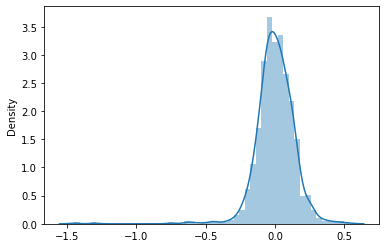

In [128]:
y_train_pred = lr_model.predict(X_train_sm)
res = y_train - y_train_pred
sns.distplot(res)
plt.show()

Errors are normally distribured here with mean 0. So everything seems to be fine

## linearity Check

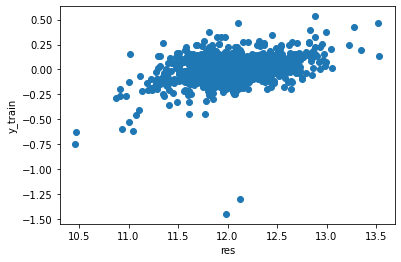

In [129]:
# scatter plot for the check

plt.scatter(y_train,res)
plt.ylabel("y_train")
plt.xlabel("res")
plt.show()

### Prediction on Test set

In [130]:
test_data.head()

,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf
1436,9000,4,6,1971,0.0,3,3,1,5,616,0,248,864,3,864,0,0,864,0,0,1,0,3,1,3,5,0,1974.0,2,528,0,0,0,0,0,0,0,5,11.699405,36,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
57,11645,7,5,2004,0.0,4,4,1,1,0,0,860,860,5,860,860,0,1720,0,0,2,1,3,1,4,7,0,2004.0,2,565,0,70,0,0,0,0,0,8,12.188418,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
780,7875,7,5,1996,38.0,3,4,1,1,0,0,1237,1237,4,1253,0,0,1253,0,0,2,0,3,1,3,6,1,1995.0,2,402,220,21,0,0,0,0,0,6,12.078239,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
382,9245,7,5,2006,0.0,4,4,3,1,0,0,939,939,5,939,858,0,1797,0,0,2,1,3,1,4,8,0,2006.0,2,639,144,53,0,0,0,0,0,4,12.271392,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
1170,9880,6,6,1977,0.0,3,3,3,5,522,0,574,1096,3,1118,0,0,1118,1,0,1,0,3,1,3,6,1,1977.0,1,358,203,0,0,0,0,576,0,7,12.049419,31,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1

In [131]:
test_data.shape

(439, 147)

In [132]:
#Get all numerical Columns
numerical_columns = data.select_dtypes(include = np.number).columns.tolist()
numerical_columns.remove('SalePrice')
numerical_columns

['LotArea',
 'OverallQual',
 'OverallCond',
 'YearRemodAdd',
 'MasVnrArea',
 'ExterQual',
 'BsmtQual',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'HeatingQC',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'HouseAge',
 'MSSubClass_30',
 'MSSubClass_40',
 'MSSubClass_45',
 'MSSubClass_50',
 'MSSubClass_60',
 'MSSubClass_70',
 'MSSubClass_75',
 'MSSubClass_80',
 'MSSubClass_85',
 'MSSubClass_90',
 'MSSubClass_120',
 'MSSubClass_160',
 'MSSubClass_180',
 'MSSubClass_190',
 'MSZoning_FV',
 'MSZoning_RH',
 'MSZoning_RL',
 'MSZoning_RM',
 'LotShape_IR2',
 'LotShape_IR3',
 'LotShape_Reg',
 'LotConfig_CulDSac',
 'LotConfig_FR2',
 'Lot

In [133]:
test_data[numerical_columns]=scaler.transform(test_data[numerical_columns])
test_data.head()

,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf
1436,-0.144614,-1.496155,0.384025,-0.679020,-0.558025,-0.699764,-0.533302,-0.653302,0.665348,0.361022,-0.293313,-0.703973,-0.431488,-1.181447,-0.765928,-0.789230,-0.124502,-1.230557,-0.837450,-0.247791,-1.028080,-0.753316,0.175669,-0.234155,-0.776063,-0.937484,-0.927153,0.232304,0.306009,0.264038,-0.744598,-0.710899,-0.368121,-0.121922,-0.275126,-0.062302,-0.084263,-0.469175,11.699405,-0.016404,-0.207125,-0.054286,-0.10436,-0.334963,-0.495098,-0.207125,-0.099454,-0.209684,-0.122109,-0.207125,-0.262888,-0.217208,-0.076885,-0.158431,-0.214724,-0.113564,0.522558,-0.421455,-0.176955,-0.094304,0.760298,-0.262888,5.651149,-0.054286,-1.565032,-0.031311,-0.109055,-0.199286,-0.141351,-0.331335,-0.179878,-0.28359,-0.233992,-0.170979,-0.094304,-0.196614,2.363704,-0.076885,-0.217208,-0.188406,-0.24765,-0.289593,-0.137703,-0.224525,-0.214724,-0.24987,-0.113564,-0.148398,-0.10436,-0.113564,1.016791,-0.062715,-0.088867,-0.658778,-0.16165,-0.222108,0.507335,-0.054286,-0.478163,-0.076885,-0.044302,-0.031311,-0.044302,-0.17399,-0.031311,-0.193911,2.337098,-0.031311,-0.450101,-0.281569,-0.044302,-0.141351,-0.719088,-0.396984,-0.141351,-0.031311,-0.070152,-0.126176,-0.031311,-0.193911,2.448091,-0.088867,-0.443793,0.0,-0.324004,-0.054286,-0.141351,-0.706587,-0.388679,-0.179878,-0.658778,0.824182,-0.318437,-0.866768,1.099980,-0.133963,-0.054286,-0.044302,-1.198647,-0.109055,-0.260752,-0.083086,1.647036,-0.243164,-0.243164,-0.620762,1.172356
57,0.112107,0.648310,-0.532073,0.923321,-0.558025,1.051361,0.577925,-0.653302,-1.226909,-0.964030,-0.293313,0.660517,-0.440205,0.871757,-0.775986,1.186484,-0.124502,0.379709,-0.837450,-0.247791,0.784821,1.

In [134]:
# Creating X_test and Y_test
Y_test = test_data.pop('SalePrice')
X_test = test_data

In [135]:
Y_test.head()

1436    11.699405
57      12.188418
780     12.078239
382     12.271392
1170    12.049419
Name: SalePrice, dtype: float64

In [136]:
X_test.head()

,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf
1436,-0.144614,-1.496155,0.384025,-0.679020,-0.558025,-0.699764,-0.533302,-0.653302,0.665348,0.361022,-0.293313,-0.703973,-0.431488,-1.181447,-0.765928,-0.789230,-0.124502,-1.230557,-0.837450,-0.247791,-1.028080,-0.753316,0.175669,-0.234155,-0.776063,-0.937484,-0.927153,0.232304,0.306009,0.264038,-0.744598,-0.710899,-0.368121,-0.121922,-0.275126,-0.062302,-0.084263,-0.469175,-0.016404,-0.207125,-0.054286,-0.10436,-0.334963,-0.495098,-0.207125,-0.099454,-0.209684,-0.122109,-0.207125,-0.262888,-0.217208,-0.076885,-0.158431,-0.214724,-0.113564,0.522558,-0.421455,-0.176955,-0.094304,0.760298,-0.262888,5.651149,-0.054286,-1.565032,-0.031311,-0.109055,-0.199286,-0.141351,-0.331335,-0.179878,-0.28359,-0.233992,-0.170979,-0.094304,-0.196614,2.363704,-0.076885,-0.217208,-0.188406,-0.24765,-0.289593,-0.137703,-0.224525,-0.214724,-0.24987,-0.113564,-0.148398,-0.10436,-0.113564,1.016791,-0.062715,-0.088867,-0.658778,-0.16165,-0.222108,0.507335,-0.054286,-0.478163,-0.076885,-0.044302,-0.031311,-0.044302,-0.17399,-0.031311,-0.193911,2.337098,-0.031311,-0.450101,-0.281569,-0.044302,-0.141351,-0.719088,-0.396984,-0.141351,-0.031311,-0.070152,-0.126176,-0.031311,-0.193911,2.448091,-0.088867,-0.443793,0.0,-0.324004,-0.054286,-0.141351,-0.706587,-0.388679,-0.179878,-0.658778,0.824182,-0.318437,-0.866768,1.099980,-0.133963,-0.054286,-0.044302,-1.198647,-0.109055,-0.260752,-0.083086,1.647036,-0.243164,-0.243164,-0.620762,1.172356
57,0.112107,0.648310,-0.532073,0.923321,-0.558025,1.051361,0.577925,-0.653302,-1.226909,-0.964030,-0.293313,0.660517,-0.440205,0.871757,-0.775986,1.186484,-0.124502,0.379709,-0.837450,-0.247791,0.784821,1.244440,0.175669,-0.2

In [137]:
#Columns from our final model

col = ['OverallQual', 'OverallCond', 'BsmtQual', 
           
       'GrLivArea', 'BsmtFullBath', 'KitchenQual', 'Fireplaces', 'GarageCars',
       'PoolArea', 'HouseAge', 'MSSubClass_160', 'MSZoning_FV', 'MSZoning_RH',
       'MSZoning_RL', 'Neighborhood_Edwards',
       'HouseStyle_1Story']

X_test_check = X_test[col]

# add aconstant to X_test_check
X_test_check = sm.add_constant(X_test[col])

In [138]:
#Predict
y_test_pred = lr_model.predict(X_test_check)

In [139]:
# Evaluate
from sklearn.metrics import r2_score
r2score =r2_score(y_true=Y_test, y_pred=y_test_pred)
print(r2score)

0.8639782287934672


In [141]:
## comparing r2 score for training model

r2score =r2_score(y_true=y_train, y_pred=y_train_pred)
print(r2score)

0.8740492395750414


In [144]:
###Checking the model metrics for train data set

#Residual Sum of Squares = Mean_Squared_Error * Total number of datapoints
rss = np.sum(np.square(y_train - y_train_pred))
print(rss)
mse = mean_squared_error(y_train, y_train_pred)
print(mse)
# Root Mean Squared Error
rmse = mse**0.5
print(rmse)

20.208093821912552
0.01979245232312689
0.1406856507364091


In [143]:
###Checking the model metrics for test data set

#Residual Sum of Squares = Mean_Squared_Error * Total number of datapoints
rss = np.sum(np.square(Y_test - y_test_pred))
print(rss)
mse = mean_squared_error(Y_test, y_test_pred)
print(mse)
# Root Mean Squared Error
rmse = mse**0.5
print(rmse)

9.841676598408666
0.022418397718470765
0.14972774531953242


In [146]:
lr_model.params

const                   12.023180
OverallQual              0.104360
OverallCond              0.055983
BsmtQual                 0.035612
GrLivArea                0.143442
BsmtFullBath             0.038948
KitchenQual              0.031426
Fireplaces               0.032164
GarageCars               0.050374
PoolArea                -0.025934
HouseAge                -0.069760
MSSubClass_160          -0.027012
MSZoning_FV              0.036904
MSZoning_RH              0.012046
MSZoning_RL              0.050636
Neighborhood_Edwards    -0.020368
HouseStyle_1Story        0.022857
dtype: float64

# Now lets try to Check whether can get a better model with regularization
- Ridge Regression
- Lasso Regression

## Ridge Regression

In [147]:
# list of alphas to tune
list_alpha = [0.0001,0.001,0.01,0.1, 0.5, 1.0, 5.0, 20, 
 40, 70, 100, 150, 200, 250, 300, 350, 400, 450, 500, 
 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000, 2000]
params = {'alpha': list_alpha}

In [148]:
# Instantiate Ridge regression
ridge = Ridge()

In [149]:
# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 5.0, 20,
                                   40, 70, 100, 150, 200, 250, 300, 350, 400,
                                   450, 500, 550, 600, 650, 700, 750, 800, 850,
                                   900, 950, 1000, 2000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [150]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<= 1000]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.113630,1.757108e-01,0.006402,0.003201,0.0001,{'alpha': 0.0001},-0.100348,-0.097615,-0.107894,-0.090629,-0.099097,-0.099117,0.005529,27,-0.080746,-0.071139,-0.074671,-0.083316,-0.081795,-0.078334,0.004643
1,0.008001,9.933790e-07,0.004801,0.003920,0.001,{'alpha': 0.001},-0.100347,-0.097615,-0.107893,-0.090627,-0.099097,-0.099116,0.005529,26,-0.080746,-0.071139,-0.074671,-0.083316,-0.081795,-0.078334,0.004643
2,0.013876,5.120427e-03,0.005191,0.003496,0.01,{'alpha': 0.01},-0.100332,-0.097616,-0.107886,-0.090613,-0.099095,-0.099108,0.005531,25,-0.080747,-0.071138,-0.074670,-0.083315,-0.081794,-0.078333,0.004643
3,0.011205,3.919939e-03,0.004794,0.003914,0.1,{'alpha': 0.1},-0.100223,-0.097621,-0.107821,-0.090501,-0.099072,-0.099047,0.005540,24,-0.080751,-0.071136,-0.074665,-0.083310,-0.081786,-0.078329,0.004643
4,0.009956,2.921263e-03,0.003257,0.003990,0.5,{'alpha': 0.5},-0.100033,-0.097565,-0.107601,-0.090246,-0.098969,-0.098883,0.005544,23,-0.080746,-0.071167,-0.074656,-0.083329,-0.081779,-0.078335,0.004637


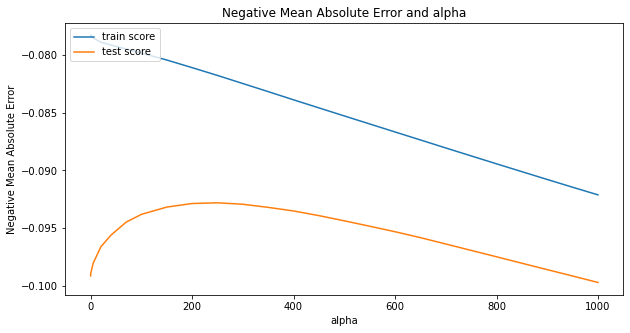

In [151]:
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.figure(figsize=(10,5))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [152]:
model_cv.best_params_

{'alpha': 250}

In [153]:
alpha = 250
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([ 1.41226730e-02,  5.19676194e-02,  2.92419310e-02,  2.27283991e-02,
        5.43072487e-03,  1.21625049e-02,  2.18606912e-02,  1.84371219e-02,
        1.94197245e-02,  7.46350016e-03,  3.21004668e-03,  4.53954824e-03,
        1.31930175e-02,  1.09511100e-02,  2.66308017e-02,  1.85815456e-02,
       -2.62376912e-04,  3.51150005e-02,  1.77434580e-02,  1.67263795e-03,
        2.36016474e-02,  1.59174576e-02,  9.96625000e-03, -1.44424870e-02,
        2.08487865e-02,  2.17942120e-02,  2.38600525e-02,  3.79367481e-03,
        2.48005896e-02,  1.89766526e-02,  1.21314877e-02, -1.05535147e-03,
        2.75504711e-03,  5.43758567e-03,  8.30236138e-03, -1.10721413e-02,
       -1.97295864e-03,  7.44598490e-04, -1.84957324e-02, -2.07490761e-02,
       -2.13845651e-03, -3.88240740e-03,  3.07318374e-03, -5.95332766e-04,
        8.05742508e-03,  8.45415443e-03, -3.65332437e-03, -1.52699771e-05,
       -4.01131899e-05, -1.00377793e-02, -1.60549573e-02, -5.42838571e-03,
       -4.60645424e-03,  

In [155]:
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)

pred = ridge.predict(X_test)
mse = np.mean((pred - Y_test)**2)
mse

0.019995364010069832

In [162]:
rmse_ridge = mse**0.5
print(rmse_ridge)

0.14140496458777474


In [156]:
# Predicting and r2 score on test data set
ridge.score(X_test,Y_test)

0.8786797851155892

In [157]:
# Predicting and r2 score on training data set
y_train_pred = ridge.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

0.9042561583575377


## Lasso Regression

In [164]:
# Instantiate Lasso regression
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 5.0, 20,
                                   40, 70, 100, 150, 200, 250, 300, 350, 400,
                                   450, 500, 550, 600, 650, 700, 750, 800, 850,
                                   900, 950, 1000, 2000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [165]:
# converting to data fram simple interpretation
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.216351,0.134318,0.002042,0.001700,0.0001,{'alpha': 0.0001},-0.099184,-0.097039,-0.106507,-0.089563,-0.098154,-0.098089,0.005401,3,-0.080602,-0.071219,-0.074592,-0.083232,-0.081853,-0.078300,0.004607
1,0.036246,0.011437,0.005126,0.005420,0.001,{'alpha': 0.001},-0.094113,-0.095086,-0.100174,-0.083618,-0.093120,-0.093222,0.005382,1,-0.080349,-0.072700,-0.075575,-0.083279,-0.082904,-0.078961,0.004166
2,0.014500,0.002798,0.001232,0.001509,0.01,{'alpha': 0.01},-0.089688,-0.098558,-0.102566,-0.087210,-0.097100,-0.095024,0.005713,2,-0.090658,-0.083559,-0.085903,-0.092049,-0.091738,-0.088782,0.003421
3,0.010964,0.005105,0.003999,0.000631,0.1,{'alpha': 0.1},-0.157933,-0.169302,-0.159718,-0.158371,-0.164764,-0.162018,0.004379,4,-0.161241,-0.155621,-0.159851,-0.160858,-0.164574,-0.160429,0.002880
4,0.007002,0.001267,0.003398,0.000489,0.5,{'alpha': 0.5},-0.312646,-0.312179,-0.306816,-0.295412,-0.325987,-0.310608,0.009883,5,-0.310026,-0.309197,-0.310983,-0.313371,-0.306761,-0.310068,0.002165


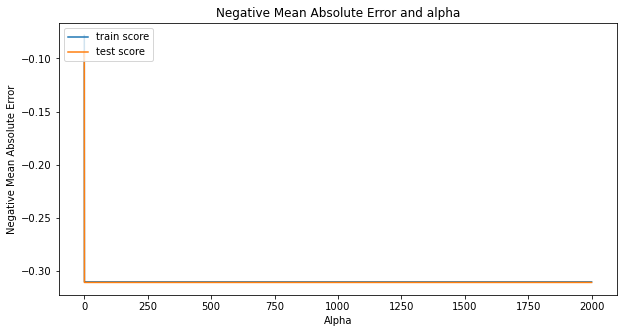

In [166]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.figure(figsize=(10,5))

plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('Alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [167]:
model_cv.best_params_

{'alpha': 0.001}

In [168]:
alpha = 0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train)

Lasso(alpha=0.001)

In [169]:
lasso.coef_

array([ 1.56176349e-02,  7.28699679e-02,  3.65934048e-02,  2.12057120e-02,
       -0.00000000e+00,  1.36822234e-03,  2.39596066e-02,  2.01013787e-02,
        2.12090628e-02, -0.00000000e+00,  0.00000000e+00,  3.54265544e-04,
        0.00000000e+00,  9.06266625e-03,  0.00000000e+00,  0.00000000e+00,
       -3.06306988e-04,  1.00123434e-01,  2.32415427e-02,  3.20110284e-03,
        2.35080200e-02,  1.74277843e-02,  5.39317800e-03, -1.81690502e-02,
        1.58846111e-02,  1.56098386e-02,  2.16095093e-02,  1.41071828e-04,
        3.95980859e-02,  4.49010549e-03,  1.07294442e-02, -2.37389370e-03,
        5.25492709e-03,  5.20920734e-03,  8.97863200e-03, -1.51513480e-02,
       -1.22976229e-03, -0.00000000e+00, -3.57114902e-02, -2.22036958e-02,
       -2.49909484e-03, -1.60814063e-03,  3.08963276e-03, -1.45041650e-02,
        1.95911479e-03,  5.74861808e-03, -3.16404445e-03,  0.00000000e+00,
        0.00000000e+00, -1.71111374e-02, -2.92144572e-02, -6.64389984e-03,
       -3.52278969e-03,  

In [171]:
lasso.score(X_test,Y_test)

0.8840556921090884

In [172]:
y_train_pred = lasso.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

0.9128371325424565


In [175]:
y_test_pred = lasso.predict(X_test) # just tried another way to get r2 score other than lasso.score(X_test,Y_test)
print(metrics.r2_score(y_true=Y_test, y_pred=y_test_pred))

0.8840556921090884


In [216]:
# Top 10 features of Ridge Regression
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = X_train.columns
cols.insert(0,'constant')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feaure','Coef']
ridge_coef.sort_values(by = 'Coef',ascending = False).head(10)

,Feaure,Coef
0,LotArea,12.023180
15,2ndFlrSF,0.038968
30,WoodDeckSF,0.036221
4,MasVnrArea,0.035180
26,Fireplaces,0.032278
6,BsmtQual,0.031768
21,HalfBath,0.029274
13,HeatingQC,0.027131
80,Neighborhood_OldTown,0.026549
9,BsmtFinSF1,0.025800


In [217]:
# Top 10 features of Lasso Regression
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = X_train.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Featuere','Coef']
# Significant variables which predict price of house when used lasso
lasso_coef.sort_values(by='Coef',ascending=False).head(10)

,Featuere,Coef
0,LotArea,12.023180
15,2ndFlrSF,0.071295
16,LowQualFinSF,0.064572
80,Neighborhood_OldTown,0.049098
4,MasVnrArea,0.047735
30,WoodDeckSF,0.046490
70,Neighborhood_Edwards,0.039138
9,BsmtFinSF1,0.038675
26,Fireplaces,0.036023
85,Neighborhood_StoneBr,0.033954


In [219]:
# Comparing the coefficinets of Linear regression, Ridge  and Lasso regression

betas = pd.DataFrame(index=X_train.columns)
betas.rows = X_train.columns
betas['Linear'] = lr_model.params
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_
betas

,Linear,Ridge,Lasso
LotArea,NaN,0.015324,1.572827e-02
OverallQual,0.104360,0.000000,0.000000e+00
OverallCond,0.055983,0.000000,0.000000e+00
YearRemodAdd,NaN,0.035180,4.773511e-02
MasVnrArea,NaN,0.011955,0.000000e+00
ExterQual,NaN,0.031768,3.258671e-02
BsmtQual,0.035612,0.000000,0.000000e+00
BsmtExposure,NaN,0.023487,2.788039e-02
BsmtFinType1,NaN,0.025800,3.867514e-02
BsmtFinSF1,NaN,0.016618,-0.000000e+00


# Conclusion

 Here we will be using Lasso as final model as it is generalized, simple and accurate.Also it gives features selection also ie, eliminating features which are not significant to model without affecting the model accuracy

#### variables which are significant in predicting the price of a house :
- LotArea: Lot size in square feet
- 2ndFlrSF: Second floor square feet
- LowQualFinSF: Low quality finished square feet (all floors)
- Neighborhood_OldTown: Physical locations within Ames city limits Old Town
- MasVnrArea: Masonry veneer area in square feet
- WoodDeckSF: Wood deck area in square feet
- Neighborhood_Edwards: Physical locations within Ames city limits Edwards
- BsmtFinSF1: Type 1 finished square feet
- Fireplaces: Number of fireplaces
- Neighborhood_StoneBr: Physical locations within Ames city limits Stone Brook


#### The optimal value of lambda for ridge and lasso regression are :
`Best alpha value for Ridge : 250`<br>
`Best alpha value for Lasso : 0.001`

# Que1: Double the values of Alpha for lasso & Ridge

In [206]:
#earlier for Ridge alpha = 250 now take 500
alpha = 500
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([ 1.53241036e-02,  0.00000000e+00,  0.00000000e+00,  3.51799696e-02,
        1.19550161e-02,  3.17681699e-02,  0.00000000e+00,  2.34867171e-02,
        2.58002360e-02,  1.66180428e-02,  5.02044919e-03,  8.62121421e-03,
        2.71308303e-02,  1.81448314e-02,  3.89683912e-02,  2.51278951e-02,
       -3.69824705e-04,  0.00000000e+00,  0.00000000e+00,  8.49316235e-05,
        2.92740318e-02,  1.94856347e-02,  9.61449635e-03, -1.73776905e-02,
        0.00000000e+00,  3.22782782e-02,  0.00000000e+00,  9.81295674e-03,
        0.00000000e+00,  3.62209462e-02,  1.78580983e-02,  4.59507220e-03,
        8.37879946e-04,  4.13950318e-03,  1.07984744e-02,  0.00000000e+00,
       -1.88724628e-03,  4.55046271e-03,  0.00000000e+00, -2.53540041e-02,
       -3.09920478e-04, -1.93026595e-03,  2.73372002e-03,  9.72597812e-03,
        1.20982914e-02,  6.89992945e-03, -1.28774676e-03, -5.19746739e-04,
       -3.95828528e-03, -4.15222038e-03,  0.00000000e+00, -5.96311343e-03,
       -5.72091206e-03,  

In [207]:
ridge.fit(X_train, y_train)

pred = ridge.predict(X_test)
mse = np.mean((pred - Y_test)**2)
mse

0.026268596954932683

In [208]:
# Predicting and r2 score on test data set
ridge.score(X_test,Y_test)

0.8406174638441463

In [209]:
# Predicting and r2 score on training data set
y_train_pred = ridge.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

0.8625760474502753


###### _Coeff values are increasing as alpha increases. r2score of train data also dropped from .90 to 0.86

In [210]:
#earlier for Lasso alpha = 0.001 now take 0.002
alpha = 0.002

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train)

Lasso(alpha=0.002)

In [211]:
lasso.coef_

array([ 1.57282659e-02,  0.00000000e+00,  0.00000000e+00,  4.77351149e-02,
        0.00000000e+00,  3.25867134e-02,  0.00000000e+00,  2.78803915e-02,
        3.86751413e-02, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        2.41994669e-02,  1.29849471e-02,  7.12946532e-02,  6.45715298e-02,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        2.81609422e-02,  2.06657530e-02,  1.32817017e-03, -3.35496562e-02,
        0.00000000e+00,  3.60234265e-02,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  4.64899403e-02,  1.63467717e-02, -3.61153180e-04,
        7.63303635e-04,  1.78766671e-03,  1.22707696e-02,  0.00000000e+00,
       -0.00000000e+00,  3.98024099e-03,  0.00000000e+00, -3.08721231e-02,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        8.95391590e-03,  5.55374767e-03, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -8.49534736e-03,  0.00000000e+00, -2.08911411e-03,
       -4.07699233e-03,  

In [212]:
lasso.score(X_test,Y_test)

0.846895044858818

In [213]:
y_train_pred = lasso.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

0.8797625230500392


### As alpha value increased more feautrues removed from model. But r2score is also dropped in both test and train data

#### Top 5 features are - `LotArea, 2ndFlrSF,LowQualFinSF,Neighborhood_OldTown,MasVnrArea`

#### Q3 drop the top 5 Features and rebuild the Lasso model

In [221]:
#Drop 5 features
X_train_new = X_train.drop(['LotArea', '2ndFlrSF','LowQualFinSF','Neighborhood_OldTown','MasVnrArea'], axis=1)

In [223]:
X_train_new.columns

Index(['OverallQual', 'OverallCond', 'YearRemodAdd', 'ExterQual', 'BsmtQual',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       ...
       'Foundation_Wood', 'GarageType_Attchd', 'GarageType_Basment',
       'GarageType_BuiltIn', 'GarageType_CarPort', 'GarageType_Detchd',
       'GarageType_NA', 'GarageFinish_NA', 'GarageFinish_RFn',
       'GarageFinish_Unf'],
      dtype='object', length=141)

In [222]:
X_test_new = X_test.drop(['LotArea', '2ndFlrSF','LowQualFinSF','Neighborhood_OldTown','MasVnrArea'], axis=1)

In [224]:
X_test_new.columns

Index(['OverallQual', 'OverallCond', 'YearRemodAdd', 'ExterQual', 'BsmtQual',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       ...
       'Foundation_Wood', 'GarageType_Attchd', 'GarageType_Basment',
       'GarageType_BuiltIn', 'GarageType_CarPort', 'GarageType_Detchd',
       'GarageType_NA', 'GarageFinish_NA', 'GarageFinish_RFn',
       'GarageFinish_Unf'],
      dtype='object', length=141)

In [225]:
# Instantiate Lasso regression
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_new, y_train) 

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 5.0, 20,
                                   40, 70, 100, 150, 200, 250, 300, 350, 400,
                                   450, 500, 550, 600, 650, 700, 750, 800, 850,
                                   900, 950, 1000, 2000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [226]:
# converting to data fram simple interpretation
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.099228,0.033026,0.004802,0.003921,0.0001,{'alpha': 0.0001},-0.109019,-0.120419,-0.126026,-0.107728,-0.115442,-0.115727,0.006887,3,-0.098292,-0.087439,-0.091159,-0.099428,-0.097095,-0.094682,0.004610
1,0.023908,0.006930,0.000000,0.000000,0.001,{'alpha': 0.001},-0.106536,-0.118375,-0.122464,-0.105516,-0.111836,-0.112945,0.006597,2,-0.098924,-0.088271,-0.092781,-0.100002,-0.098462,-0.095688,0.004477
2,0.011197,0.003908,0.003201,0.003920,0.01,{'alpha': 0.01},-0.104604,-0.115938,-0.123559,-0.101438,-0.109296,-0.110967,0.007967,1,-0.106151,-0.097219,-0.099854,-0.107424,-0.107654,-0.103660,0.004296
3,0.023967,0.015143,0.001601,0.003202,0.1,{'alpha': 0.1},-0.186092,-0.193424,-0.191473,-0.175234,-0.194294,-0.188103,0.007038,4,-0.187723,-0.180301,-0.186432,-0.187769,-0.189659,-0.186377,0.003208
4,0.008054,0.005061,0.004801,0.003920,0.5,{'alpha': 0.5},-0.312646,-0.312179,-0.306816,-0.295412,-0.325987,-0.310608,0.009883,5,-0.310026,-0.309197,-0.310983,-0.313371,-0.306761,-0.310068,0.002165


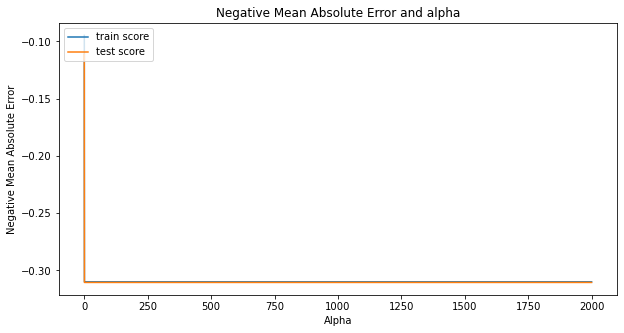

In [227]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.figure(figsize=(10,5))

plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('Alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [228]:
model_cv.best_params_

{'alpha': 0.01}

In [229]:
alpha = 0.01

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_new, y_train)

Lasso(alpha=0.01)

In [230]:
lasso.coef_

array([ 0.        ,  0.        ,  0.04411333,  0.04488449,  0.        ,
        0.02355831,  0.03237714,  0.        ,  0.        ,  0.        ,
        0.03051932,  0.01451225,  0.04984274,  0.        ,  0.        ,
        0.        ,  0.04238942,  0.0325633 ,  0.        , -0.03454904,
        0.        ,  0.06033809,  0.        ,  0.0027342 ,  0.        ,
        0.06038191,  0.01500642,  0.        ,  0.        ,  0.        ,
        0.00663248,  0.        , -0.        ,  0.        ,  0.        ,
       -0.03224564,  0.        , -0.        ,  0.        ,  0.01600763,
        0.00207178,  0.        , -0.        , -0.        , -0.        ,
       -0.        ,  0.        , -0.        , -0.        ,  0.        ,
        0.        ,  0.        , -0.        ,  0.        , -0.00238441,
       -0.00210708,  0.01003064, -0.        , -0.        , -0.        ,
        0.        , -0.00604899,  0.0018528 ,  0.00905248, -0.        ,
        0.03062841,  0.        ,  0.        , -0.01327316, -0.01

In [231]:
lasso.score(X_test_new,Y_test)

0.8378799148137547

In [232]:
y_train_pred = lasso.predict(X_train_new)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

0.8517144350279915


In [237]:
# Top 5 features of Lasso Regression after dropping first 5 important features
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = X_train_new.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Featuere','Coef']
# Significant variables which predict price of house when used lasso
lasso_coef.sort_values(by='Coef',ascending=False).head(10)

,Featuere,Coef
0,OverallQual,12.023180
26,WoodDeckSF,0.060382
22,Fireplaces,0.060338
13,GrLivArea,0.049843
4,BsmtQual,0.044884
3,ExterQual,0.044113
17,HalfBath,0.042389
18,BedroomAbvGr,0.032563
7,BsmtFinSF1,0.032377
66,Neighborhood_Edwards,0.030628


## Top 5 features of Lasso Regression after dropping first 5 important features
` OverallQual,WoodDeckSF,Fireplaces,GrLivArea,BsmtQual`